# 1-3 마켓과 머신러닝


In [ ]:
# 도미 데이터 (35개)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

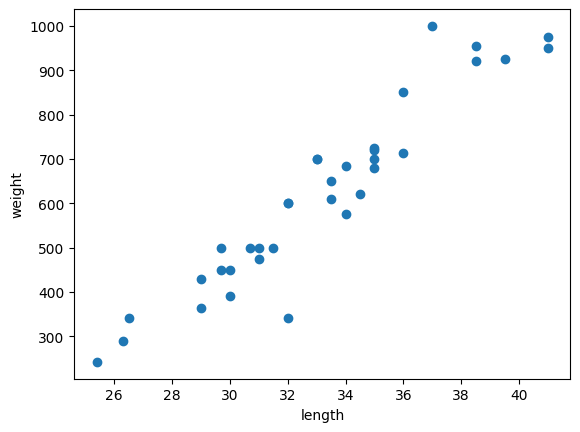

In [ ]:
import matplotlib.pyplot as plt

# 도미 데이터의 산점도
plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # x축 이름: 길이
plt.ylabel('weight') # y축 이름: 무게
plt.show()


In [ ]:
# 빙어 데이터 (14개)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

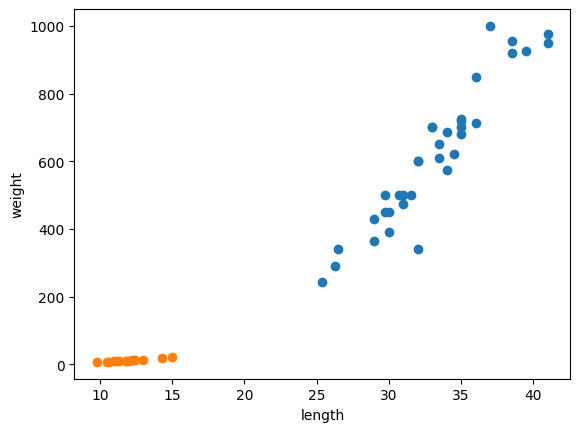

In [ ]:
# 도미 데이터의 산점도와 빙어 데이터의 산점도
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length') # x축 이름: 길이
plt.ylabel('weight') # y축 이름: 무게
plt.show()

# 파란색: 도미
# 주황색: 빙어

## k-최근접 이웃 알고리즘을 사용해 도미와 빙어의 데이터 비교

In [ ]:
# 각 생선의 데이터 리스트를 길이, 무게의 변수로 병합
length = bream_length + smelt_length
weight = bream_weight + smelt_weight


In [ ]:
# scikit-learn(사이킷 런)을 사용할려면 데이터 셋이 엑셀 처럼 세로 방향으로 늘어진 2차원 리스트(DataFrame)으로 만들어야 한다.
# 방법 1 : zip()함수 사용 또는 list comprehence(리스트 내포 구문) 사용
fish_data = [[l,w] for l,w in zip(length, weight)]
# 추가 zip()함수는 리스트에서 원소 하나씩 꺼내주는 함수
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [ ]:
# 정답 데이터 만들기 1: 도미 , 0: 빙어
fish_target = [1] * 35 + [0] *14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# scikit-learn 패키지에서 k-최근접 이웃 알고리즘 사용
from sklearn.neighbors import KNeighborsClassifier # 특정 클래스만 import 할 때 사용
# KNeighborsClassifier의 객체 만들기
kn = KNeighborsClassifier()


In [ ]:
# 데이터와 정답지를 kn에 입력하여 훈련 진행 -> fit(훈련 데이터, 정답지) 함수 사용
kn.fit(fish_data, fish_target)
# 훈련이 잘 훈련이 되었는지 확인 -> score(훈련 데이터, 정답지) = 정확도 1,0 = 100%
kn.score(fish_data, fish_target)

1.0

In [ ]:
# 새로운 데이터가 입력되었을 때 예측
kn.predict([[30, 600]])


array([1])

## k-최근접 이웃 알고리즘
 - 새로운 데이터 예측 시 기존 데이터에서 직선 거리로 가장 가까운 데이터가 어떤 것인지 확인하여 예측
### 장점
  - 사용하기 위해 필요한 것: 데이터를 모두 가지고 있는 것
### 단점
  - 데이터가 아주 많은 경우 사용하기 부적합하다.
### 결론
  -  _fit_X 속성에 훈련 데이터를 저장, _fit_y 속성에 정답 데이터를 저장
  -  이를 바탕으로 새로운 데이터 입력 시 가장 가까운 데이터를 참고하여 예측
  따라서 무언가 훈련이 되는 것이 없음..
  


In [ ]:
# 참고 데이터 개수를 변화하여 예측하기
kn49 = KNeighborsClassifier(n_neighbors=17) # default 값은 5, kn49는 참고 데이터 개수: 49
# 이를 바탕으로 훈련 진행
kn49.fit(fish_data, fish_target)
# 훈련이 잘 되었는지 확인
kn49.score(fish_data, fish_target)


1.0

In [ ]:
# 정확도
print(35/49)

0.7142857142857143


### 참고하는 데이터의 개수는 49개는 적절하지 않음.
 -> 49개중 다수인 35개가 도미임.
따라서 참고 데이터의 수는 기본 값인 5로 하는 것이 합리적임


In [ ]:
# 연습 문제
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5,50):
  kn.n_neighbors = n
  score = kn.score(fish_data, fish_target)
  if score < 1:
    print(n , score)
    break

18 0.9795918367346939


# 2-1훈련 세트와 테스트 세트

In [ ]:
# 훈련 세트와 테스트 세트
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l,w]for l,w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14 # 35개의 훈련 세트와 14개의 테스트 세트

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [ ]:
print(fish_data[4])

[29.0, 430.0]


In [ ]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [ ]:
train_input= fish_data[:35] # 훈련 세트로 입력 값 중 0~34 인덱스의 데이터 사용
train_target = fish_target[:35] # 훈련 세트로 타겟 값 중  0~34 인덱스의 데이터 사용
test_input = fish_data[35:] # 테스트 세트로 입력값 중 35~ 끝 인덱스의 데이터 사용
test_target = fish_target[35:] # 테스트 세트로 입력 값 중 35~ 끝 인덱스의 데이터 사용

In [ ]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

# 샘플링 편향
- 샘플이 훈련 세트와 테스트 세트에 골고루 섞여 있어야 함.
- 그렇지 않다면 샘플링 편향이 발생.


In [ ]:
# 배열 라이브러리를 사용하기
import numpy as np


In [ ]:
# 데이터 세트를 2차원 배열로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [ ]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [ ]:
print(input_arr.shape)

(49, 2)


In [ ]:
np.random.seed(42) # 랜덤 시드 고정
index =np.arange(49) # 0~48까지 숫자 생성
np.random.shuffle(index) # 섞기

In [ ]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
print(input_arr[[1,3]]) # 배열 인덱싱

[[ 26.3 290. ]
 [ 29.  363. ]]


In [ ]:
# 훈련 데이터 준비
train_input = input_arr[index[:35]]
train_target =  target_arr[index[:35]]

In [ ]:
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [ ]:
# 테스트 데이터 준비
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

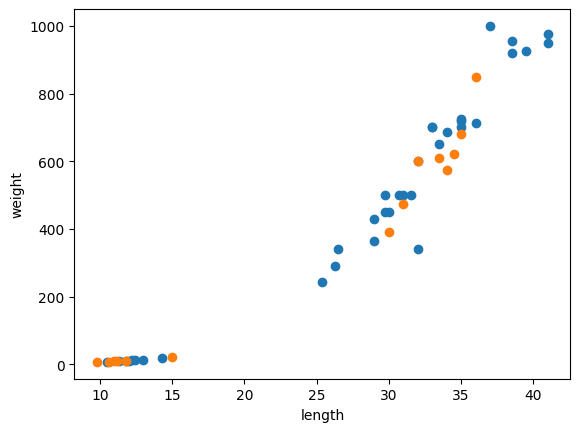

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 2번째 머신러닝


In [ ]:
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [ ]:
print(test_target)

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]


# 2-2 데이터 전처리

In [ ]:
# 훈련 세트와 테스트 세트
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
import numpy as np
np.column_stack(([1,2,3],[4,5,6]))
# column_stack() 전달받은 리스트를 일렬로 세운 다음 차례대로 나열하는 함수

array([[1, 4],
       [2, 5],
       [3, 6]])

In [ ]:
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
print(np.ones(5)) # np.ones와 np.zeros() 함수: 각각 배열에 1과 0을 채워놓는 함수

[1. 1. 1. 1. 1.]


In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
# column_stack: 테이블 형태
# concatenate: 배열 형태

In [ ]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [ ]:
# 훈련 세트와 테스트 세트 나누기
from sklearn.model_selection import train_test_split

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
# random_state 는 np.random_seed와 동일한 기능

In [ ]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [ ]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [ ]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
# stratify: 타깃 데이터 전달 시 클래스 비율에 맞게 데이터를 나누어준다.


In [ ]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
print(kn.predict([[25,150]]))

[0.]


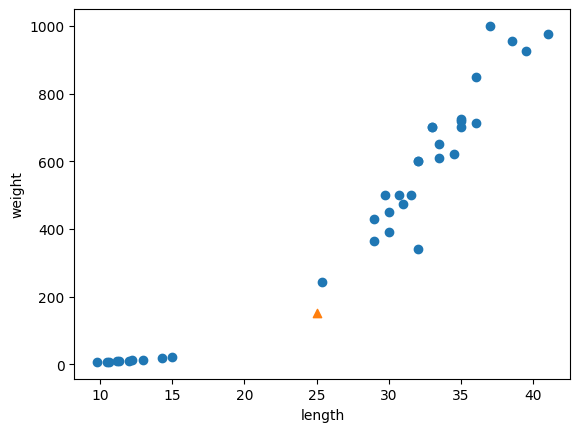

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
distance, indexes = kn.kneighbors([[25,150]])

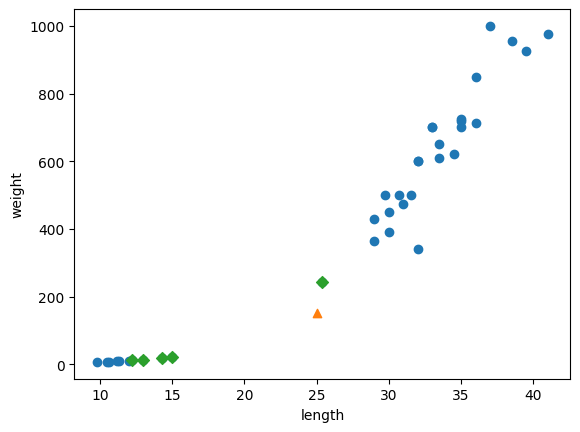

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# x축과 y축의 스케일 차이

In [ ]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [ ]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [ ]:
print(distance)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


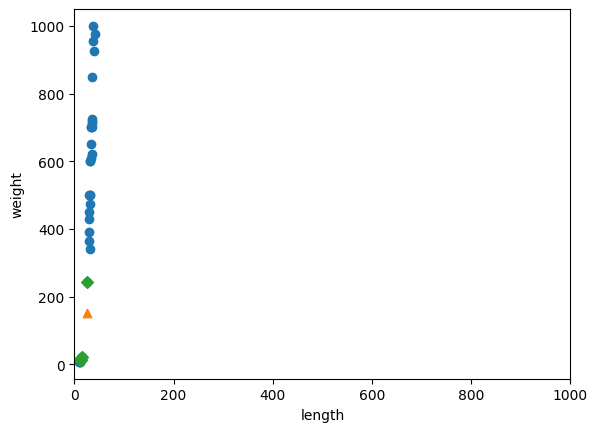

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim(0,1000) # x축의 스케일을 y축과 같게 만듦
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
mean = np.mean(train_input, axis = 0) # 평균
std = np.std(train_input, axis = 0) # 표준 편차

In [ ]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [ ]:
# 브로드캐스팅
train_scaled  = (train_input - mean) / std # 표준 점수(z값): 원점에서 몇 표준 편차 만큼 떨어져 있는지를 나타내는 값

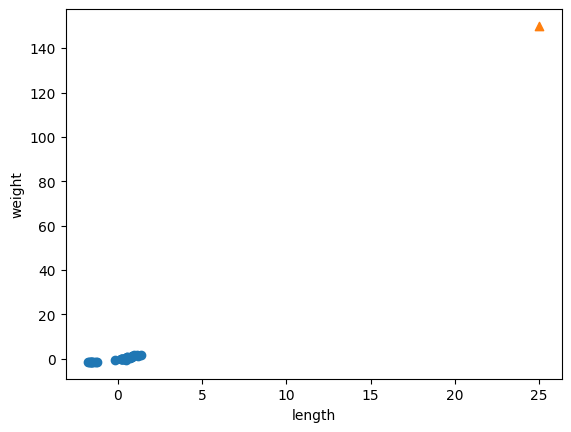

In [ ]:
# 전처리 데이터로 훈련하기

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150, marker='^') # 전처리 되지 않음.
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

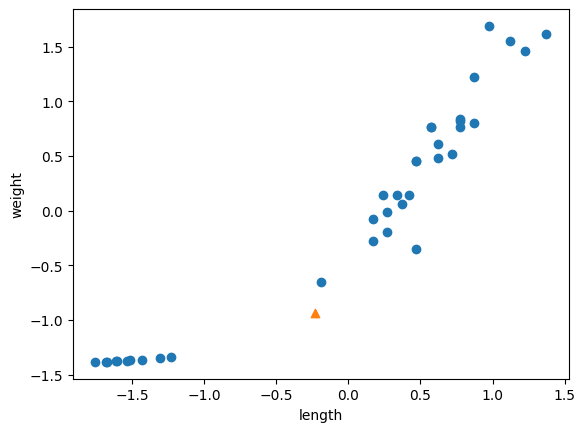

In [ ]:
# 표준 점수로 전처리 후 산점도
new = ([25, 150] - mean) / std # 전처리 완료
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
test_scaled = (test_input - mean)/ std

In [ ]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
print(kn.predict([new]))

[1.]


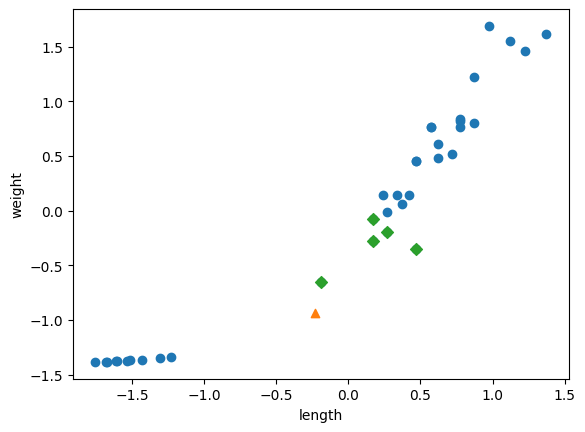

In [ ]:
distances , indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 3-1 K-최근접 이웃 회귀


In [ ]:
import numpy as np
# 농어 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

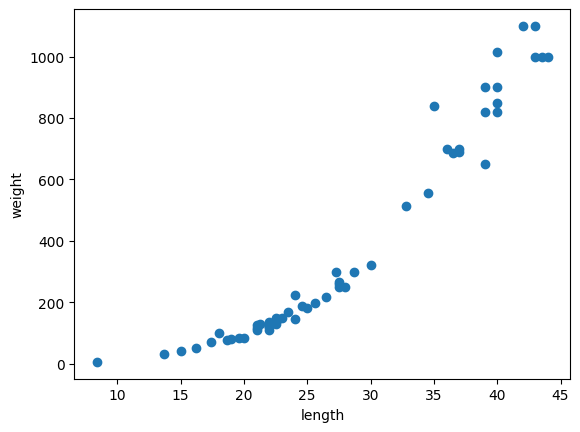

In [ ]:
# 산점도 그리기
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [ ]:
# 1차원 배열을 -> 2차원 배열로 변환
test_array = np.array([1,2,3,4])
print(test_array.shape)
test_array = test_array.reshape(2,2)
print(test_array.shape)
# 주의점: 지정한 크기와 원본 배열의 크기는 일치해야 함

(4,)
(2, 2)


In [ ]:
# 위의 내용을 이용하여 1차원 배열의 훈련 세트와 타겟 세트를 2차원 배열로 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [ ]:
# 결정 계수 R^2
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델 훈련
knr.fit(train_input, train_target)


KNeighborsRegressor()

In [ ]:
# 결정 계수 점수 = 1 - (타깃-예측)^2의 합/ (타깃-평균)^2의 합

# 테스트 세트 점수
print(knr.score(test_input, test_target))
# 타깃의 평균 정도 예측: 결정 계수가 0에 수렴
# 예측이 타깃에 가까워질수록: 결정 계수가 1에 수렴

0.992809406101064


In [ ]:
#타깃과 예측의 절댓값 오차 평균을 하여 반환
from sklearn.metrics import mean_absolute_error
# 테스트 세트에 대한 예측
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

#  결론 평균적으로 19g 정도 타깃 값과 다르다.

19.157142857142862


In [ ]:
# 훈련 세트 점수
print(knr.score(train_input, train_target))

0.9698823289099254


## 과대 적합
- 훈련 세트 점수가 좋았지만. 테스트 점수가 나쁜 경우.
## 과소 적합
- 훈련 세트 점수 보다 테스트 점수가 좋은 경우.
- 두 점수가 모두 낮은 경우.
- 원인: 훈련 세트와 테스트 세트의 크기가 매우 작은 경우 발생
- 해결법: 모델을 조금 더 복잡하게..(훈련 세트에 더 잘 맞게 만들기)-> k 이웃의 개수 줄이기 -> 이로 인해 훈련 세트에 있는 국지적인 패턴에 민감해진다.,
- k 이웃의 개수를 늘리면 일반적인 패턴을 따른다.

In [ ]:
# 과소 적합을 해결하기 위해 k 이웃의 개수 줄이기
knr.n_neighbors = 3
# 모델 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.9746459963987609


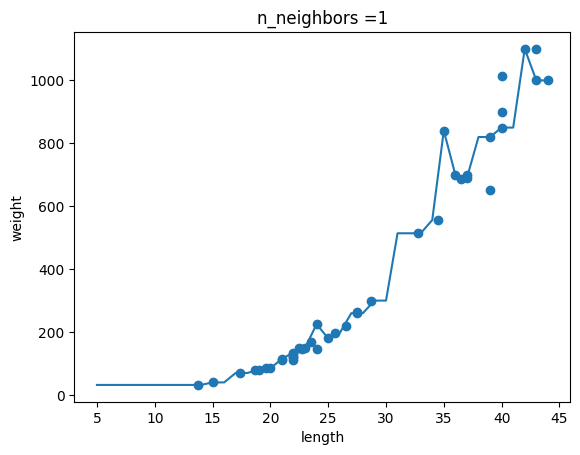

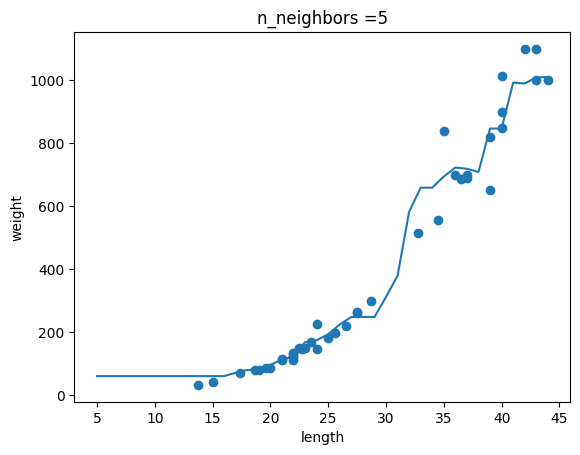

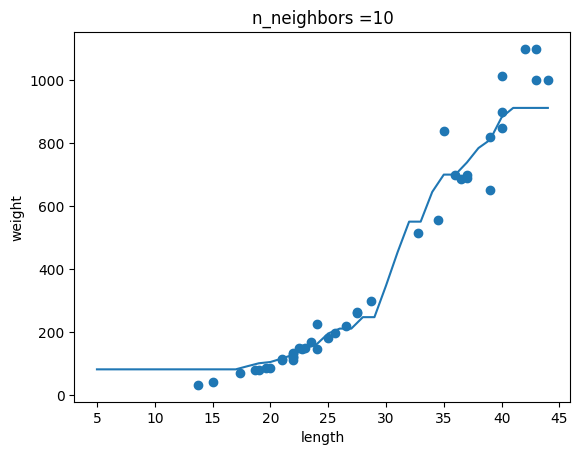

In [ ]:
# k-최근접 이웃 회귀 객체를 만듦
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듦
x = np.arange(5,45).reshape(-1,1)
# n= 1,5,10 일 때 예측 결과를 그래프로 그림.
for n in [1,5,10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  # 훈련 세트와 예측 결과를 그래프를 그림
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors ={}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

# 3-2 선형 회귀
k-최근접 이웃 회귀와 선형 회귀 알고리즘의 차이 이해


In [ ]:
import numpy as np
# 농어 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나뉩
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변환
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
#  길이가 50cm인 농어의 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


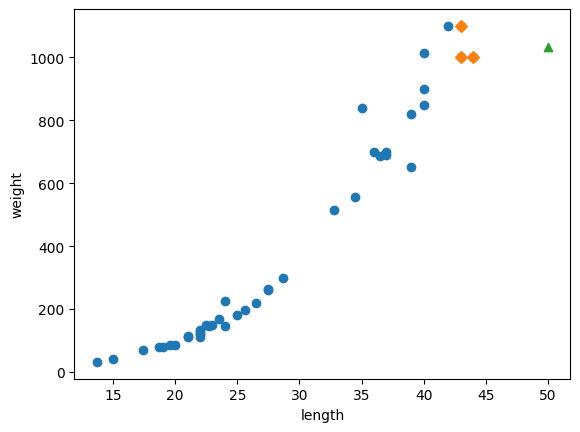

In [ ]:
import matplotlib.pyplot as plt

# 50cm 인 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 최근접 이웃들의 무게 평균
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
#  길이가 100cm인 농어의 무게 예측
print(knr.predict([[100]]))

# 길이가 50cm 이상인 농어인 경우에도 1033g으로 예측


[1033.33333333]


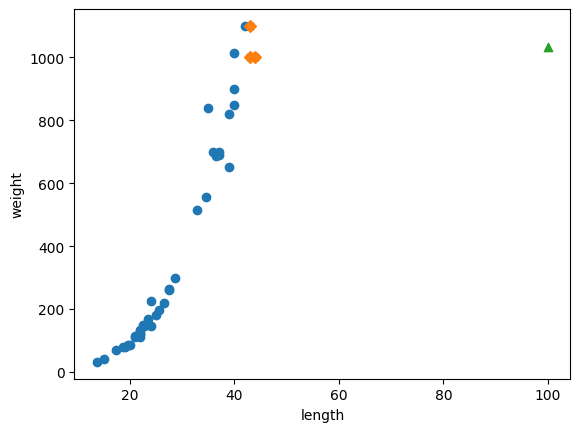

In [ ]:
# 100cm인 농어의 이웃 구하기
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그림
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 농어의 길이가 커져도 무게가 더 늘지 않음

In [ ]:
# 다른 방법: 선형 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
# 위 그래프의 기울기와 y 절편
print(lr.coef_, lr.intercept_)

# coef: coeffcient(기울기), 가중치(weight)
# coef와 intercept => 모델 파라미터
# 알고리즘의 훈련 방법은 최적의 파라미터 찾는 것
# 앞서 k-최근접 이웃에는 모델 파라미터가 없음. -> 훈련 세트를 저장하는 것이 훈련의 전부 => 사례 기반 학습.

[39.01714496] -709.0186449535477


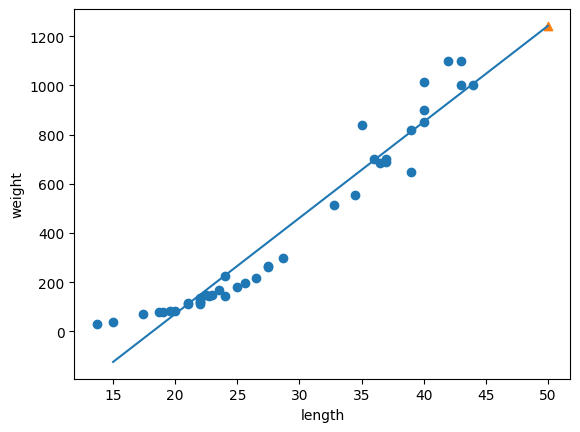

In [ ]:
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
# 15에서 50까지의 1차 방정식 그리기
plt.plot([15,50], [15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련 세트
print(lr.score(train_input, train_target))
# 테스트 세트
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [ ]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly  = np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


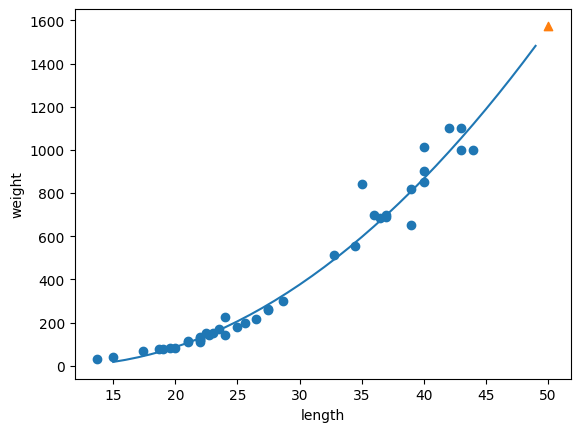

In [ ]:
# 구간별 직선을 그리기위해 15~49까지 정수 배열 만들기
point = np.arange(15,50)

# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15~49 까지 2차 방정식 그래프 그리기
plt.plot(point, 1.01*point**2 - 21.6*point + 115.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련 세트
print(lr.score(train_poly, train_target))
# 테스트 세트
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


03-3 특성 공학과 규제


In [ ]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [ ]:
# 사이킷런의 변환기 -> 특성을 만들거나 전처리하는 클래스가 있음.
from sklearn.preprocessing import PolynomialFeatures

poly =  PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]])) # 훈련을 해야 변환이 가능.
# 무게 = a * 길이 + b * 높이 + c + 두께 * d + 1

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
# 사이킷런의 변환기 -> 특성을 만들거나 전처리하는 클래스가 있음.
from sklearn.preprocessing import PolynomialFeatures

poly =  PolynomialFeatures(include_bias=False) # 특성에 추가된 절편 항 무시.
poly.fit([[2,3]])
print(poly.transform([[2,3]])) # 훈련을 해야 변환이 가능.
# 무게 = a * 길이 + b * 높이 + c + 두께 * d + 1

[[2. 3. 4. 6. 9.]]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly =  PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)


(42, 9)


In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [ ]:
# 특성 더 추가하기
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [ ]:
print(lr.score(test_poly, test_target))

# 샘플의 갯수보다 특성의 개수가 더 많다면 의미가 없음..

-144.40579436844948


In [ ]:
# 선형 회귀 모델에 계수를 규제하기
# 사이킷 런에서 제공하는 StandardScaler

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
# 표준 점수로 변환
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#규제(regularization): 머신러닝 모델이 훈련 세트를 과도하게 학습하지 못하도록 훼방하는 것.
# 모델이 훈련세트에 과대적합하지 못하게 만드는 것.
# 선형 회귀 모델의 경우 특성에 곱해지는 계수의 크기를 작게 만드는 것..


In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

# 릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절 할 수 있음..
# 모델 객체를 만들 때 alpha 매개변수로 규제의 강도를 조절..
# alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 다 과소적합 되도록 유도..
# alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형 회귀 모델과 유사해지므로 과대적합될 가능성..

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

# 사람이 직접 지정하는 매개변수: hyperparmeter.
# 함수와 클래스의 파라미터는 매개변수, 모델과 관련된 파라미터(모델 파라미터, 하이퍼파라미터)는 파라미터로 표현

0.9790693977615387


In [ ]:
import matplotlib.pyplot as plt
train_score =[]
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 릿지 모델 만들기
  ridge = Ridge(alpha = alpha)
  # 릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장.
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

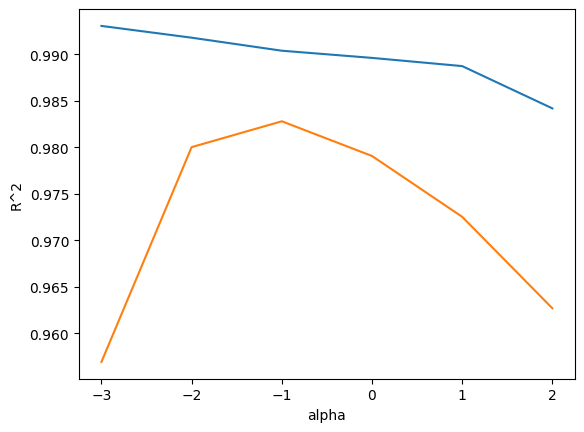

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 파란색: 훈련 세트 그래프
# 주황색: 테스트 세트 그래프
# 적절한 alpha 값은 두 그래프가 가장 가깝고, 테스트 세트의 점수가 가장 높은 -1 즉 0.1

In [ ]:
# alpha = 0.1로 하여 최종 모델 학습.
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


In [ ]:
# 라쏘 회귀
# 계수 값을 0으로 만들어 규제
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
train_score=[]
test_score=[]
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델 만들기
  lasso = Lasso(alpha = alpha, max_iter=10000)
  # 라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

  #ConvergenceWarning: 지정한 반복 횟수가 부족할 때..
  # 필요하면 더 늘릴 수 있음.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


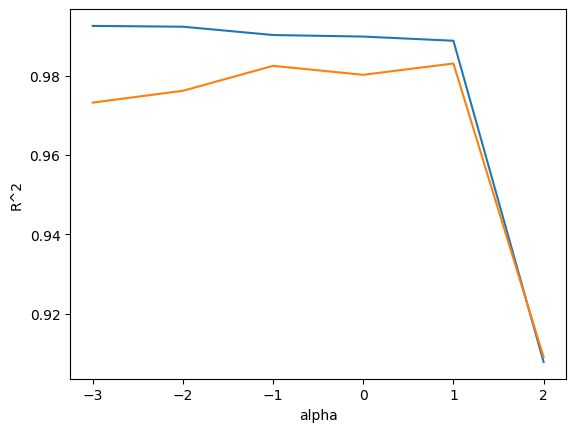

In [ ]:
plt.plot(np.log10(alpha_list), train_score) # 파란색
plt.plot(np.log10(alpha_list), test_score) # 주황색
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 그래프 해석
# 그래프 왼쪽은 과대 적합, 오른쪽으로 갈수록 훈련 세트와 테스트 세트의 점수 격차 감소. 오른쪽은 아주 크게 점수가 떨어짐(과소 적합 지점).\
# 최적 alpha 값 1 즉 10

In [ ]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))
# 라쏘 모델의 계수는 coef_ 속성에 저장.

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))
# 계수의 값이 0인 것의 개수 55개 중 40개가 0. 즉 15개의 유효 특성이 있음.

40


# 4-1 로지스틱 회귀

In [ ]:
# 럭키백의 확률
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340

In [ ]:
# 생선 종류 출력
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
# to_numpy() 메서드로 넘파이 배열로 변환하여 저장
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [ ]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
# Species 열 선택
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [ ]:
# 훈련세트와 테스트 세트 표준화 전처리하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# K-촤근접 이웃 분류기의 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3) # 최근접 이웃을 3으로 설정.
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
# 사이킷런에서 문자열로 된 타깃 값을 사용 가능
# 원래 순서
print(pd.unique(fish['Species']))
# 알파벳 순서로 정렬 -> KNeighborsClassifier에서 정렬된 순서
print(kn.classes_)

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 타깃 값 예측
print(kn.predict(test_scaled[:5]))


['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))

# 사이킷런의 분류 모델은 predict_proba()메서드로 클래스별 확률을 출력
# 넘파이 round()메서드는 기본적으로 소수점 첫째 자리에서 반올림.
# decimals 매개변수로 유지할 소수점 자리 지정 가능.
# 클래스 순서는 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 순


[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])
# 이 샘플의 이웃은 다섯 번째 클래스인 'Roach'가 1개 , 세 번째 클래스인 'Perch'기 2개임.
# 다섯 번째 클래스에 대한 확률은 1/3 = 0.3333 , 세 번째 클래스에 대한 확률은 2/3 = 0.6666

[['Roach' 'Perch' 'Perch']]


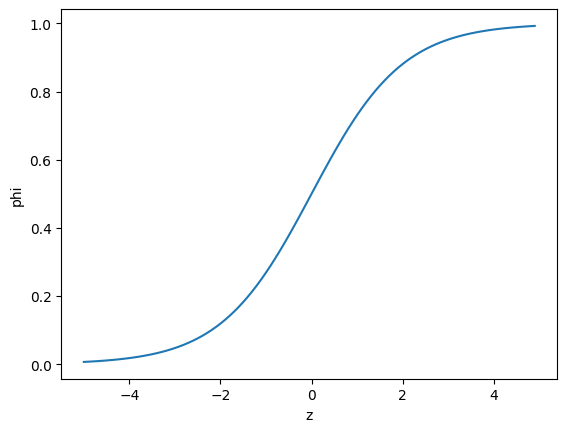

In [ ]:
# 로지스틱 회귀 -> 선형 방정식 학습
# z = a * (Weighbt) + b * (Lengtb) + c * (Diagonal) + d * (Heigbt) + e * (Width) + f
# a,b,c,d,e는 가중치
# 시그모이드 함수 사용 (파이 = 1/ (1+e^(-z))) -> z 값을 0에서 1사이로 변환

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1) # -5와 5사이를 0.1 간격으로 배열 z 만듦
phi = 1 / (1 + np.exp(-z)) # 시그모이드 함수 식
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

# 이진 분류의 경우 0.5를 기준으로 초과면 양성 , 미만이면 음성으로 취급 -> 사이킷런 기준 0.5인 경우 음성,  0.5를 판단하는 것은 라이브러리 마다 다름
# 로지스틱 회귀분석 -> LogisticRegression 클래스 사용

In [ ]:
#로지스틱 회귀로 이진 분류 수행하기

# 참과 거짓으로 행 선택하기 -> 불리언 인덱싱.
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
# 불리언 인덱싱을 사용하여 도미(Bream)행과 빙어(Smelt) 색출하기
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt') # 도미와 빙어가 들어간 행만 True, 그 외는 False
train_bream_smelt = train_scaled[bream_smelt_indexes]
traget_bream_smelt = train_target[bream_smelt_indexes]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, traget_bream_smelt)

LogisticRegression()

In [ ]:
# train_bream_smel에 있는 5개의 데이터 샘플 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# predict_proba()를 사용해 train_bream_smel에 있는 5개의 데이터 샘플 예측
print(lr.predict_proba(train_bream_smelt[:5]))

# 순서 ['Bream' 'Smelt']

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [ ]:
print(lr.classes_)
# 양성 클래스가 Smelt, 음성 클래스가 Bream

['Bream' 'Smelt']


In [ ]:
print(lr.coef_, lr.intercept_) # 로지스틱 모델이 학습한 선형 방정식의 계수가 들어있음.

#  z = -0.404  * (Weighbt) + -0.576 * (Lengtb) + -0.663 * (Diagonal) + -1.013 * (Heigbt) + -0.732* (Width) + 2.161.

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# 처음 5개의 샘플의 z 값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
# decision_function() : z 값 출력 함수 , 양성 클래스에 대한 z 값
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# z 값을 시스모이드 함수에 대입하기 => expit()사용
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [ ]:
# 로지스틱 회귀로 다중 분류 수행.
lr = LogisticRegression(C = 20 , max_iter = 1000)
# 반복 횟수(max_iter)는 1000회
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

# 로지스틱 회귀 모델은 릿지 모델처럼 계수의 제곱을 규제 -> L2 규제
# 로지스틱 회귀 모델에서 규제를 제어하는 매개변수 : C
# C의 값이 작을수록 규제가 크다.


0.9327731092436975
0.925


In [ ]:
# 테스트 세트의 처음 5개 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

# 순서 ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

# coef_ 배열의 열은 5개 : 샘플의 개수, 7행: 생선 종류
# intercept도 7 -> z 값을 7번 계산
# 다중 분류는 소프트맥스 방법 사용

(7, 5) (7,)


In [ ]:
# 소프트 맥스 방법을 사용하여 다중 분류
# 1. e_sum = e^(z1)+e^(z2)+e^(z3)+e^(z4)+e^(z5)+e^(z6)+e^(z7)
# 2. e^(z1) ~ e^(z7)을 e_sum으로 나누기
#   s1 = e^(z1)/e_sum, s2 = e^(z2)/e_sum, s3 = e^(z3)/e_sum ....
# 3. s1 ~ s7 까지의 합은 1

# decision_function()으로 z1 ~ z7의 값 구하기

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals =2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
# softmax() 함수 사용
from scipy.special import softmax
proba  = softmax(decision, axis = 1) # axis 지정 안하면 배열 전체에 대해 소프트맥스 계산
# axis = 1은 각 행에 대한 소프트맥스 계산
print(np.round(proba, decimals =3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 4-2 확률적 경사 하강법


In [ ]:
# 점진적인 학습: 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하기
# 대표적 알고리즘: 확률적 경사 하강법(Stochastic gradient decent) -> 신경망 알고리즘에서 꼭 사용한다.
# 확률적 경사 하강법이란: 확률적: 랜덤하게 또는 무작위하게,  경사: 기울기, 하강법: 내려가는 방법
# 즉 경사하강법은 기울기를 따라 내려가는 방법
# e.g : 산에서 가장 빠르게 내려오는 방법: 가파른 길을 천천히 조금씩 내려오는 것.

# 즉, 확률적 경사 하강법은 딱 하나의 샘플을 전체 세트가 아닌 훈련 세트에서 무작위로 골라 가장 가파른 길을 선택하는 것.
# 하나의 샘플을 선택하여 가파른 경사를 조금씩 내려감 -> 훈련 세트에서 또 다른 하나의 샘플을 선택, 가파른 경사를 내려감-> 이런 식으로 전체 샘플을 전부 사용할 때까지 반복.
# 만약 전체 샘플을 다 사용했는데 산을 다 내려오지 못했다> 다시 처음부터 시작.
# 확률적 경사 하강법에서 훈련 세트를 한번 모두 사용하는 과정을 에포크(epoch)

# 하나의 샘플이 아닌 여러 샘플을 선택하여 경사 하강법 진행하는 경우 -> 미니배치 경사 하강법(Minibatch gradient decent)
# 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 방법 -> 배치 경사 하강법(Batch gradient decent)

# 가장 빠르게 내려가려고 하는 산의 정체: 손실 함수
# 손실함수(loss function)이란?
# 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준.
# 손실 함수 값이 작을수록 좋음.
# 손실함수의 최솟값을 알 수는 없음-> 가능한 값을 다 찾아보고 만족할만한 값을 찾으면 산을 다 내려왔다고 인지.

# 비용함수(cost function)
# 훈련세트에 있는 모든 샘플들에 대한 손실 함수의 합. 비용함수와 손실함수는 엄격히 구분하지 않고 혼용

# 손실의 예
# 이진분류에서 정답을 찾지 못하는 것.
# 손실함수는 정확도의 범위인 0~ 1.0을 음수 취한 값으로 표현 가능 => -1.0 ~ -0.0
# 또한 손실함수라는 산을 조금씩 내려와야 하기에 손실함수는 미분 가능해야 함.


In [ ]:
# 로지스틱 손실 함수(Logistic loss function) 또는 이진 크로스엔트로피 함수(binary cross-entropy loss function)
# 양성클래스(타깃 = 1) -> 손실 함수 = -log(예측 확률)
# 양성 클래스의 예측 확률이 1에서 멀어져 0에 가까울 수록 손실은 아주 큰 양수가 된다.

# 음성클래스(타깃 = 0) -> 손실 함수 = -log(1-예측 확률)
# 음성 클래스의 예측 확률이 0에서 멀어져 1에 가까울 수록 손실은 아주 큰 양수가 된다.

#  만약 다중 분류에서는 크로스-엔트로피 손실 함수(cross-entropy loss function) 사용
#  회귀에서는 평균 절대값 오차; 타깃에서 예측을 뺀 절대값을 모든 샘플에 평균한 값
#  또는 평균 제곱 오차(mean squared error): 타깃에서 예측을 뺀 값을 제곱한 다음 모든 샘플에 평균을 구한 값

# 손실함수를 계산하는 일은 드물다. -> 라이브러리가 대신 해줌.


In [ ]:
# 확률적 경사 하강법 모델 만들기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
# Species열을 제외하고 5개의 열을 입력 데이터로 사용
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
# 사이킷런의 train_test_split을 사용해 훈련세트와 테스트 세트를 만든다.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
# 훈련 세트와 테스트 세트의 특성을 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스: SGDClassifier
from sklearn.linear_model import SGDClassifier
# SGDClassifier의 객체를 만들 때 2개의 매개변수 지정 -> loss는 손실 함수의 종류 지정, max_iter는 반복횟수
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42) # 손실함수는 로그함수, 10번의 반복하는 객체
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 반복횟수 부족으로 인한 정확도 낮음.

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
# 점진적 훈련 진행-> partial_fit()함수 사용
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# 에포크를 1번 더 실행 -> 정확도 상승
# 에포크 횟수를 정하는 기준이 필요

0.8151260504201681
0.85


In [ ]:
# 에포크와 과대적합 / 과소적합.

# 에포크 횟수가 적을 수록 과소적합이 나타나고, 에포크 횟수가 많을 수록 과대적합이 나타남
# 훈련 세트는 에포크 횟수가 증가할수록 점수가 늘어나고, 테스트 세트에서는 어느 순간 점수가 하강하는 시점이 존재
# 이 시점이 모델이 과대적합되기 시작하는 곳.
# 이 시점이 오기 전에 훈련을 종료하는 것: 조기 종료(early stopping)


In [ ]:
# 매 에포크 마다 점수를 저장하기위한 목록 만듦
import numpy as np
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
# 300번의 에포크 진행
for _ in range(0,300): # 여기서 _의 의미는 버리는 값을 넣어두는 용도
  sc.partial_fit(train_scaled, train_target, classes = classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

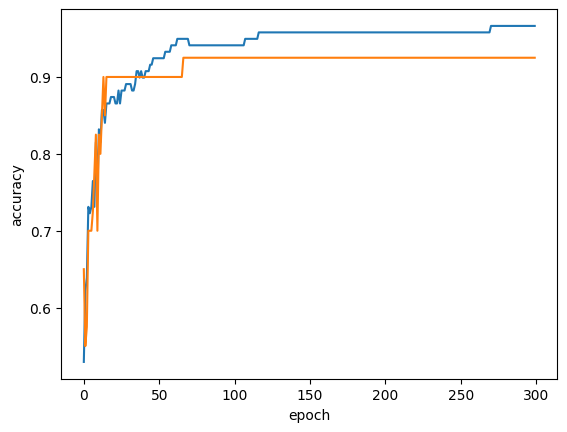

In [ ]:
# 결과 확인
import matplotlib.pyplot as plt
plt.plot(train_score) # 파란색
plt.plot(test_score) # 주황색
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 100번째 에포크 이후 훈련세트와 테스트 세트의 점수 차가 벌어지고 있음
# 에포크 초기에는 과소적합이 발생

In [ ]:
# 적절한 에포크 횟수인 100이라 가정하고 진행
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol=None, random_state = 42) # 손실함수는 로그함수, 에포크 횟수가 100번인 객체 , tol=None: 멈추지 않고 반복횟수 만큼 진행
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#  SGDClassifier의 매개변수인 loss에 대하여
# loss의 기본값은 힌지(hinge)
# 힌지 손실(hinge loss)는 서포트 벡터 머신(support vector machine)이라는 벡터 머신에서 사용하는 손실 함수

0.957983193277311
0.925


# 5-1 결정 트리

In [ ]:
# 로지스틱 회귀로 와인 분류하기
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
wine.head()
# class가 0이면 레드와인 class가 1이면 화이트 와인

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [ ]:
wine.info()
# 각 열의 데이터 타입과 누락된 데이터가 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()
# 평균, 표준편차, 최소, 최대 값, 중간 값, 1사분위 수, 3분위 수를 알려줌

alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

In [ ]:
# 데이터프레임을 numpy배열로 변환 -> 훈련 세트와 테스트 세트 생성
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
# StandardScaler를 사용해 훈련 세트와 테스트 세트 전처리하기
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 로자스틱 회귀 모델 사용
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
print(lr.coef_, lr.intercept_)

# y =  알코올 도수 * 0.51270274 + 당도 * 1.6733911 + pH *  -0.68767781 + 1.81777902
# y겂이 0보다 작으면 레드 와인 0보다 크면 화이트 와인으로 분류
# 정확도 77%

# 정리하자면 알코올 도수와 당도가 높을 수록 화이트 와인에 가깝고, ph가 높을 수록 레드와인

# 순서도처럼 쉽게 설명하는 방법

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [ ]:
# 결정 트리를 사용해 설명하기 -> 스무고개
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled,train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

# 훈련 세트는 점수가 높지만, 테스트 세트는 점수가 낮다 => 과대 적합

0.996921300750433
0.8592307692307692


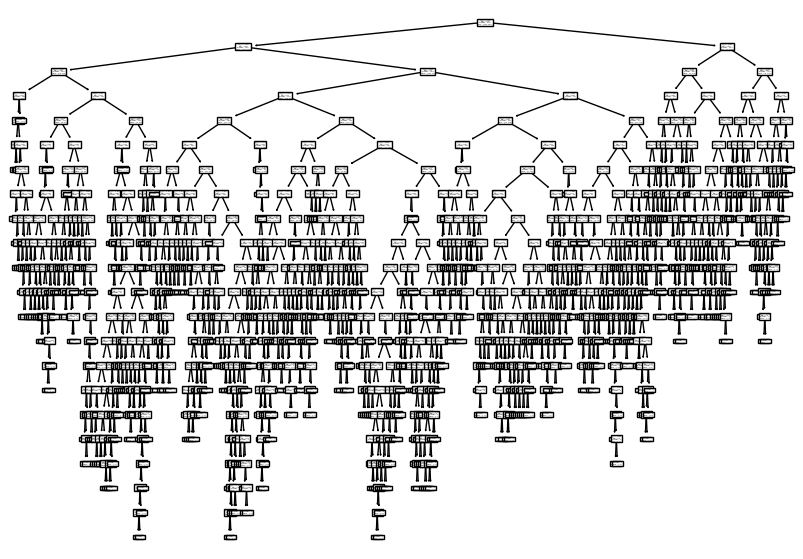

In [ ]:
# 결정트리를 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7))
plot_tree(dt)
plt.show()

# 결정 트리는 위(root)에서 부터 아래(leaf)로 진행

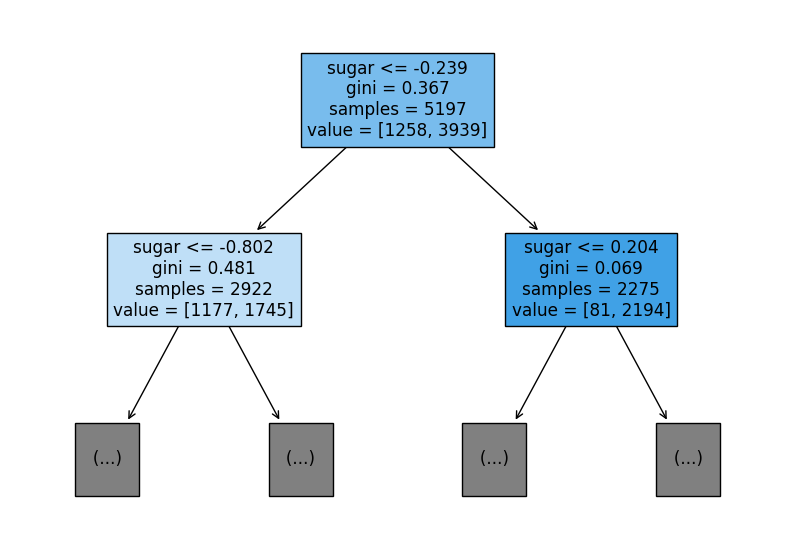

In [ ]:
# 결정트리의 깊이를 제한해서 출력
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names = ['alcohol','sugar','pH'])
plt.show()

# 노드 해석
# 테스트 조건 : sugar <= -0.239
# 불순도: gini = 0.367
# 총 샘플 수: samples = 5197
# 클래스별 샘플 수: value = [1258,3939]

# 불순도(Gini impurity): 데이터를 분할할 기준을 정하는 것.
# 지니 불순도: default 값
# 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)
# 노드 하나의 클래스만 있다면 지니 불순도는 0이 되어 가장 작습니다. -> 순수 노드
# 지니 불순도가 만역 0.5라면 최악이 된다.

# 따라서 결정 트리의 모델은 부모 노드와 자식 노드의 분순도 차이가 크도록 설정.

# 부모 노드와 자식 노드의 붛순도 차이 계산 하기 -> 정보 이득
# 부모의 불순도 - (왼쪽 노드의 샘플 수 / 부모의 샘플 수) * 왼쪽 노드의 불순도 -  (오른쪽 노드 샘플 수 - 부모의 샘플 수) * 오른쪽 노드 불순도

# 엔트로피 불순도 사용하기 -> criterion = 'entropy'
# 공식
# 음성 클래스 비율 * log2(음성 클래스 비율) - 양성 클래스 비율 * log2(양성 클래스 비율)

In [ ]:
# 가지치기 -> 트리의 최대 깊이 제한
dt = DecisionTreeClassifier(max_depth = 3, random_state =42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


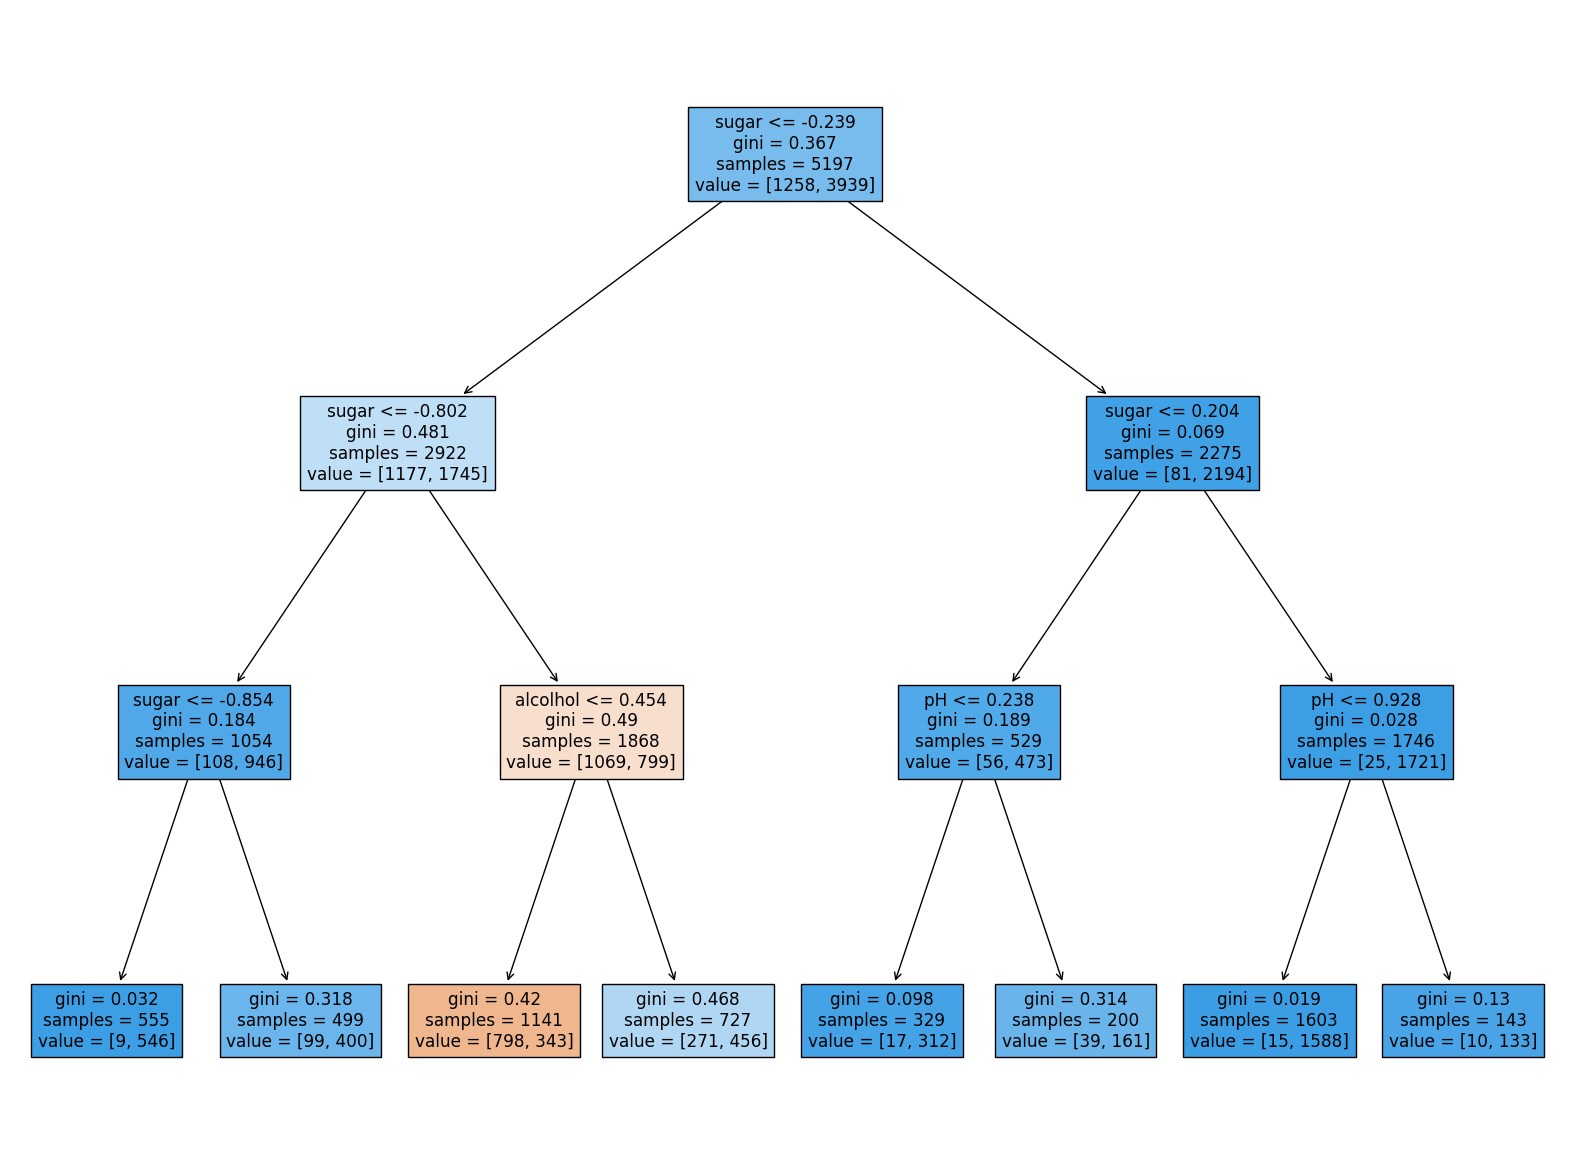

In [ ]:
#트리 그래프 그리기
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names = ['alcolhol','sugar', 'pH'])
plt.show()

# 그래프 해석
# 왼쪽에서 세번째 리프 노드만 음성 클래스 -> 당도가-0.802< x >-0.239 and 알코올 도수가 y =>0.454 =>  x 값과 y값 모두 충족하는 와인 -> 레드 와인
# 당도가 음수인 것을 어떻게 설명해야 하나요?
# 불순도를 기준으로 샘플을 분류, 분순도는 클래스 별 비율을 가지고 계산 => 특성값의 스케일이 계산에 영형을 주진 않기 때문에 표준화 전처리 필요 없음.




In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


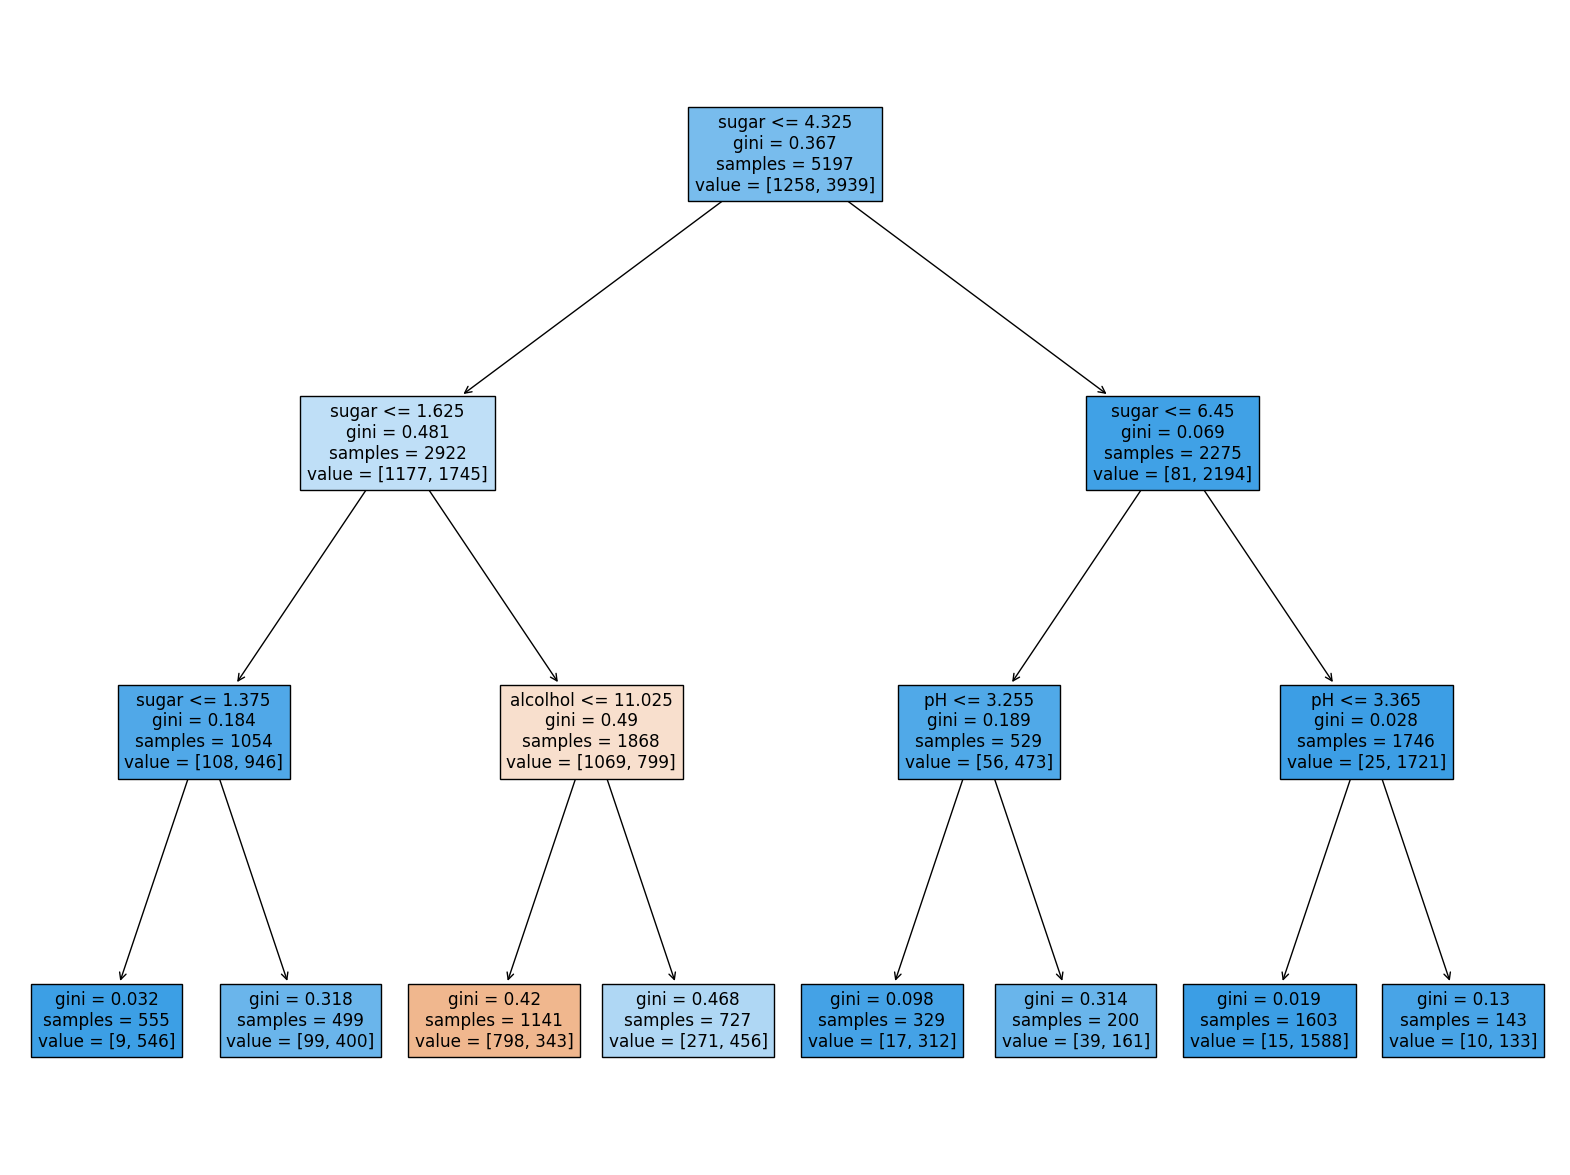

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True, feature_names = ['alcolhol','sugar', 'pH'])
plt.show()

# 화이트 와인(양수 클래스) : 파란색 계열
# 레드 와인(음수 클래스): 주황색 계열
# 레드와인 판별 기준: 1.625 < 당도 < 4.325  그리고 알코올 농도 <= 11.025 인 조건을 만족함

# 5-2 교차 검증과 그리드 서치
## 교차 검증
### 테스트 세트를 사용하지 않으면 모델이 과대적합인지 과소적합인지 알기 어렵다. => 테스트 세트를 사용하지 않고  이를 측정하는 방법은 검증 세트 사용하는 것.


In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
# 훈련 세트와 테스트 세트 만들기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [ ]:
# 훈련 세트와 검증 세트 만들기
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size = 0.2, random_state = 42)

In [ ]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

# 결론
# 훈련 세트에 과대 적합되어 있음.=> 더 좋은 모델을 찾는 것이 좋음.

0.9971133028626413
0.864423076923077


In [ ]:
# 교차 검증을 이용하여 안정적인 점수를 얻고 훈련에 더 많은 데이터를 사용할 수 있음.
# 과정: 검증 세트를 떼어 네아 평가하는 과정을 여러번 반복함.
# eg. 3-폴드 교차 검증 훈련 세트를 3부분으로 나누어서 교차 검증을 수행하는 것
# 훈련 세트를 몇 부분으로 나누냐에 따라 다르게 부른다.

# 보통 5-포드 교차 검증 또는 10-폴드 교차 검증를 많이 사용한다.
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)


# 결론
# fit_time, score_time은 각각 모델 훈련하는 시간. 검증하는 시간을 의미
#test_score:교차 검증 점수

{'fit_time': array([0.01636004, 0.01012802, 0.01068115, 0.01038408, 0.01146269]), 'score_time': array([0.00162864, 0.00164318, 0.00165963, 0.00176239, 0.00192237]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
# 교차 검증 최종 점수를 가지고 평균
import numpy as np
print(np.mean(scores['test_score']))


0.855300214703487


In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
# 10-폴드 교차 검증
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
scores = cross_validate(dt, train_input, train_target, cv = splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


In [ ]:
 # 하이퍼파라미터 튜닝: 사용자가 지정해야 하는 파라미터
 # 과정
 # 1. 라이브러리가 제공하는 기본값을 그대로 사용해 모델 만들기
 # 2. 검증세트나 교차 검증을 통해 매개변수를 조금씩 바꾸기(모델마다 적게는 1~2개, 많게는 5~6개의 매개 변수 제공)
 # 3. 이 매개변수를 바꿔가면 모델을 훈련하고 교차검증을 수행.

 # 가장 중요한 점
 # e.g 결정 트리 모델에서 최적의 max_depth을 찾았다면
 # 그 다음 max_depth을 고정, min_sample_split을 바꿔가며 최적의 값을 찾는다.
 # max_depth 값은 min_sample_split이 변화할 때마다 변화
 # 매개 변수가 많아지면 문제가 더 복잡해지는데 이는 그리드 서치를 이용하여 해결

 # 사이킷 런의 GridSearchCV 클래스는 하이퍼파라미터 탐색과 교차 검증을 한번에 수행
 # ->  결정 트리 모델에서 min_impurity_decrease 매개변수 최적값을 찾아보자.

from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':  [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [ ]:
# GridSearchCV의 cv 매개변수의 기본값 5,
gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs = -1)

In [ ]:
# 그리드 서치는 훈련이 끝나면 전체 모델 중 검증 점수가 높은 모델을 가지고 한 번 더 모델을 훈련 시킴.
# 그리드 서치 훈련 시 min_impurity_decrease의 값마다 5-폴드 교차 검증을 진행
# 이 모델의 경우 5 * 5  = 25 번의 학습을 진행
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [ ]:
# dt 객체에 25개의 모델 중에서 검증 점수가 가장 높은 모델의 매개변수를 저장
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.9615162593804117


In [ ]:
# min_impurity_decrease을 그리드 서치로 찾은 최적의 값 출력
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
# 각 매개변수에서 수행한 교차 검증의 평균값
print(gs.cv_results_['mean_test_score'])

[0.86819297 0.86453617 0.86492226 0.86780891 0.86761605]


In [ ]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0001}


In [ ]:
params ={'min_impurity_decrease': np.arange(0.0001,0.001,0.0001),
         'max_depth': range(5,20,1),
         'min_samples_split': range(2,100,10)
         }
# 0.0001 부터 0.001까지 0.0001 간격으로 배열 생성 -> 9개의 원소
# max_depth 값이 5부터 20까지 1씩 증가하는 15개 값 생성
# min_samples_split 값이 2부터 100까지  10씩 증가하는 10개의 값 생성

# 따라서 이 매개변수로 수행할 교차 검증 횟수는 9*15*10 = 1350 회
# 5-폴드 교차 검증 진행 -> 1350 * 5 = 6750 회


In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state =42), params, n_jobs = -1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
# 최상의 매개변수 조합 출력
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
# 최상의 교차 검증 점수
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


In [ ]:
# 랜덤 서치
from scipy.stats import uniform, randint

# 싸이파이(scipy)
# 파이썬의 핵심 과학 라이브러리
# 적분, 보간, 선형 대수, 확률 등을 포함한 수치 계산 전용 라이브러리

# uniform과 randint
# 주어진 범위에서 고르게 값을 뽑음 => 균등 분포에서 샘플링
# randint: 정수값
# uniform: 실수값


In [ ]:
# 샘플링
rgen = randint(0,10)
rgen.rvs(10)

array([6, 7, 2, 0, 3, 1, 7, 3, 1, 5])

In [ ]:
np.unique(rgen.rvs(1000), return_counts = True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([120,  79, 108,  93, 107,  99,  92,  99,  95, 108]))

In [ ]:
ugen = uniform(0,1)
ugen.rvs(10)

array([0.03387916, 0.31147317, 0.78049571, 0.27758717, 0.22009721,
       0.21268078, 0.51517368, 0.97554132, 0.45898899, 0.55730537])

In [ ]:
params = { 'min_impurity_decrease': uniform(0.0001, 0.001),
            'max_depth': randint(20,50),
           'min_samples_split': randint(2,25),
           'min_samples_leaf' : randint(1,25)
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter = 100,
                        n_jobs = -1, random_state = 42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d1c708b6aa0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d1c3d39f3a0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d1c708b59c0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d1c3d39c970>},
                   random_state=42)

In [ ]:
# 최고의 매개변수 조합 출력
print(gs.best_params_)

# {'max_depth': 39,
# 'min_impurity_decrease': 0.00034102546602601173,
# 'min_samples_leaf': 7,
#  'min_samples_split': 13}

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [ ]:
# 최고의 검증 점수 출력
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [ ]:
# 최적의 모델을 가지고 테스트 세트의 성능 파악
dt =  gs.best_estimator_
print(dt.score(test_input, test_target))

# 수동으로 매개변수를 바꾸는 대신 랜덤 서치를 사용한다.


0.86


In [ ]:
# 최적의 모델을 찾기 위한 하이퍼파라미터 탐색
# 테스트 세트는 최종 모델을 선택하기 전에 사용하면 안 된다.
# 테스트 세트를 사용하지 않고, 모델을 평가하기 위해 또 다른 세트가 필요함-> 검증 세트
# 검증 세트는 훈련 세트에서 분할하여 생성
# 훈련 세트를 5에서 10등분 -> 1덩어리를 폴드라 부름
# 한 폴드씩 돌아가며 검증 세트 역할을 맡음
# 전체적으로 5~10개의 모델을 만들고 최종 검증 점수는 모든 폴드의 검증 점수를 평균으로 계산

# 교차 검증을 사용해 하이퍼파라미터를 탐색
# 클래스와 메서드를 범위 내에서 지정된 횟수만큼 매개변수를 바꾸어 훈련하고 평가해본다
# 테스트하고 싶은 매개변수 리스트를 만들어 이 과정을 자동화하는 그리드 서치를 사용

# 매개변수 값이 수치형이고, 연속적인 실수값일 경우 싸이파이의 확률 분포 객체를 전달하여
# 특정 범위 내에서 지정된 횟수 만큼 매개변수 후보 값을 샘플링하여 교차 검증을 시도할 수 있음.
# 이는 한정된 자원을 최대한 활용하여 효율적으로 하이퍼파라미터 공간을 탐색할 수 있음.

# 5-3 트리의 앙상블

## 정형 데이터와 비정형 데이터
### 정형 데이터
- csv 파일에 가지런히 정리된 데이터: 정형 데이터
- 데이터 베이스
- 프로그래머가 다루는 대부분의 데이터
- > 정형 데이터를 다루는데 가장 뛰어난 성과를 지닌 알고리즘: 앙상블
### 비정형 데이터
- 정형 데이터가 아닌 것
- 텍스트
- 이미지
- 영상
- > 신경망 알고리즘을 사용

## 랜덤 포레스트(Random Forest)
- > 사이킷 런의 RandomForestClassifier
- 앙상블 학습의 대표 주자
- 결정 트리를 임의로 생성-> 각 결정 트리의 예측을 사용해 최종 예측을 만든다
### 부트스트랩 방식
- 데이터 세트에서 중복을 허용하여 데이터를 샘플링 하는 방식


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs = -1, random_state =42)
# n_jobs=-1로 설정하면 사용 가능한 모든 CPU 코어를 사용하여 병렬 처리를 최대화
# n_jobs=1로 설정하면 병렬 처리를 사용하지 않고, 단일 코어에서만 작업이 수행됩니다.
# 특정 숫자(예: n_jobs=2)를 설정하면 그만큼의 코어를 사용하여 작업을 병렬로 수행합니다.
scores = cross_validate(rf, train_input, train_target, return_train_score= True, n_jobs =-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

# 랜덤 포레스트는 결정 트리의 앙상블-> 결정트리분류 클래스가 제공하는 중요한 매개변수를 모두 제공.
# 결정 트리의 주요한 장점 중 하나인 특성 중요도를 계산할 수 있음. => 랜덤 포레스트의 특성 중요도는 각 결정 트리의 트겅 중요도를 취합한 것,


0.9973541965122431 0.8905151032797809


In [ ]:
# 랜덤 포레스트의 특성 중요도 출력 해보기
rf.fit(train_input, train_target)
print(rf.feature_importances_)

# 결정트리에서 분석한 결과와 비교해보기
# 랜덤 포레스트
# 알코올: 0.23167441 당도: 0.50039841 pH: 0.26792718
# 결정 트리
# 알코올: 0.12345626 당도: 0.86862934 pH: 0.0079144
# 비교 결과
# -> 당도의 중요도가 감소하고, 알코올과 pH의 중요도 상승.
# 이는 하나의 특성에 과도하게 집중하지 않고 좀 더 많은 특성이 훈련에 기여할 기회를 얻는다. 과대 적합을 줄이고 일반화 성능을 높이는데 도움이 됨.


[0.23167441 0.50039841 0.26792718]


In [ ]:
#랜덤 포레스트에는 재미있는 기능이 있음. -> 자체적으로 모델을 평가하는 점수를 얻을 수 있음.
# 부트스트랩 샘플에 포함되지 않는 샘플: OOB(Out Of Bug)샘플
# 이를 사용해 부트스트랩 샘플로 학습한 모델을 평가할 수 있음.

# 이 점수를 얻고 싶다면 oob_score=True로 지정

rf = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


In [ ]:
# 엑스트라 트리
# 랜덤 포레스트와 비슷하게 작동
# 차이점: 결정트리 100개를 훈련 => 전체 특성 중 일부 특성을 랜덤하게 선택하여 노드를 분할
# 또한 부트스트랩 샘플을 사용하지 않는다
# 각 결정 트리를 만들 때 전체 훈련 세트를 훈련 -> 노드를 분할할 때 무작위로 분할.
# 엑스트라 트리가 사용하는 결정트리는 splitter = 'random'인 결정 트리

from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(et, train_input, train_target, return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))
# 훈련 세트와 테스트 세트의 점수 출력

0.9974503966084433 0.8887848893166506


In [ ]:
et.fit(train_input, train_target)
print(et.feature_importances_)

# 결과 해석
# 특성 중요도: 알코올: 0.20183568, 당도: 0.52242907, pH:0.27573525
# 이 역시 결정트리보다 당도의 중요성이 감소한 것을 알 수 있음.

# 결정트리는 최적의 분할을 찾는데 시간이 오래걸림. 특히 고려할 특성의 개수가 많을 때 두드러짐.
# 만약 무작위로 나눈다면 걸린 시간을 줄일 수 있음


[0.20183568 0.52242907 0.27573525]


In [ ]:
# 그레이던트 부스팅
# 깊이가 얕은 결정트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 기법
# 사이킷 런의 GrandientBoostingClassifier은 깊이가 3인 결정트리를 100개 사용하기 때문에 과대 적합에 강하고 높은 일반화 성능을 기대할 수 있음.
# 경사하강법을 사용하여 트리를 앙상블에 추가,
# 분류에서는 로지스틱 손실 함수를 사용하고 회귀에서는 평균 제곱 오차 함수를 사용한다.
# 결정트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동한다.
# 학습률을 매개변수로 속도를 조절할 수 있다.

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state = 42)
scores = cross_validate(gb, train_input, train_target, return_train_score= True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [ ]:
# 학습률 증가 시키기
gb = GradientBoostingClassifier(n_estimators = 500 , learning_rate = 0.2,
                                random_state = 42)
scores = cross_validate(gb, train_input, train_target,
                        return_train_score = True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


In [ ]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

# 결과
# 그레이던트 부스팅은 랜덤 포레스트에 비해 일부 특성에 집중.


[0.15872278 0.68010884 0.16116839]


In [ ]:
# 히스토그램 기반 그레이던트 부스팅
# 정형 데이터를 다루는 알고리즘 중에 가장 인기가 많은 알고리즘
# 입력 특성을 256개의 구간으로 나누어 노드를 분할할 때 최적의 분할을 빠르게 찾을 수 있도록 함.
# 256개의 구간 중에서 하나를 떼어놓고 누락된 값을 위해 사용
# 입력에 누락된 특성이 있더라도 전처리 할 필요가 없음

# HistGradientBoostingClassifier 클래스를 사용.
# 일반적으로 기본 매개변수만 사용해도 안정적인 성능을 얻을 수 있다.
# 트리의 개수를 지정하는데 부스팅 반복 횟수를 지정하는 max_iter 매개변수를 사용
# 성능을 높이기 위해 max_iter 매개변수를 테스트하기

# 히스토그램 기반 그레이디언트 부스팅은 테스트 과정에 있음.

# 사용법
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state = 42)
scores = cross_validate(hgb, train_input, train_target, return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


In [ ]:
# 중요도 확인
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats = 10 , random_state = 42, n_jobs = -1 )
print(result.importances_mean)

# 결과
# 당도 속성의 중요도를 높게 여기는 모델

[0.08876275 0.23438522 0.08027708]


In [ ]:
result = permutation_importance(hgb, test_input, test_target,  n_repeats = 10, random_state = 42, n_jobs = -1 )
print(result.importances_mean)

# 결론
# 당도 속성의 중요도를 높게 생각.

[0.05969231 0.20238462 0.049     ]


In [ ]:
# 테스트 세트에서의 최종 성능
hgb.score(test_input, test_target)

0.8723076923076923

In [ ]:
# 히스토그램 기반 그레이디언트 회귀 모델
from xgboost import XGBClassifier
xgb = XGBClassifier(treee_method = 'hist', random_state = 42)
scores = cross_validate(xgb, train_input, train_target, return_train_score = True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:01:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "treee_method" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:01:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "treee_method" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:01:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "treee_method" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:01:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "treee_method" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:01:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "treee_method" } are not used.



0.9558403027491312 0.8782000074035686


In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state = 42)
scores = cross_validate(lgb, train_input, train_target, return_train_score = True, n_jobs = -1)

In [ ]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


# 비지도 학습
- 타깃을 모르는 비지도 학습


## 6-1 군집 알고리즘


In [ ]:
# 과일 사진 데이터 준비
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

# ! 의 의미: 파이선 코드가 아닌 리눅스 셀로 이해하도록 함.

--2024-08-28 06:01:21--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-08-28 06:01:21--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-08-28 06:01:22--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conne

In [ ]:
# 과일 데이터 불러오기
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')

In [ ]:
print(fruits.shape)
# 100*100 이미지 크기를 지닌 사진이 300장 있음.

(300, 100, 100)


In [ ]:
print(fruits[0, 0, :])

#이 넘파이 배열은  흑백 사진을 담고 있어 0~255의 정수값을 지니고 있다.

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


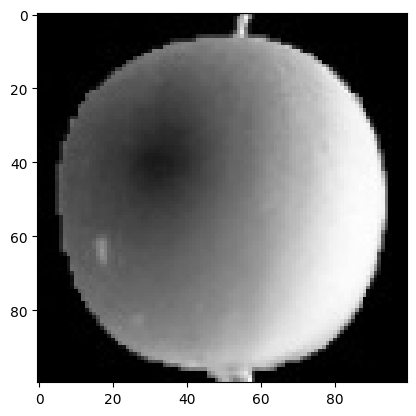

In [ ]:
# 사진으로 출력해보기
plt.imshow(fruits[0], cmap = 'gray')
plt.show()

# 0에 가까울 수록 검게 255에 가까울 수록 희게 나타남
# 첫 번째 행이 1픽셀 100개가 있고 이 행이 100개가 있는 이미지

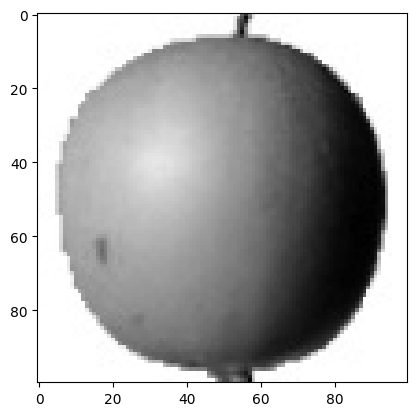

In [ ]:
# 색 반전 시키기
# 컴퓨터는 255에 가까운 바탕에 집중: 알고리즘이 어떤 출력을 할 때 곱셈, 뎃셈을 한다.
# -> 픽셀 값이 0이라면 출력도 0이 되어 의미가 없음  => 픽셀 값이 높으면 출력 값도 높아지기 때문에 의미를 부여해도 Ok.

plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

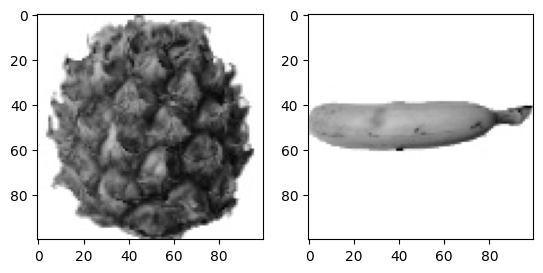

In [ ]:
# 다른 과일 출력해보기
# fruits 데이터에 사과, 파인애플, 바나나가 각각 100개씩 존재
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')

In [ ]:
# 픽셀 값 분석
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1, 100*100)

In [ ]:
print(apple.shape)

#axis 인수: 배열의 축을 의미 axis = 1이면 열 방향(가로)으로 계산, axis=0이라면 행 방향(새로)으로 계산.

(100, 10000)


In [ ]:
# 사과 100개에 대한 픽셀 평균 값.
print(apple.mean(axis = 1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


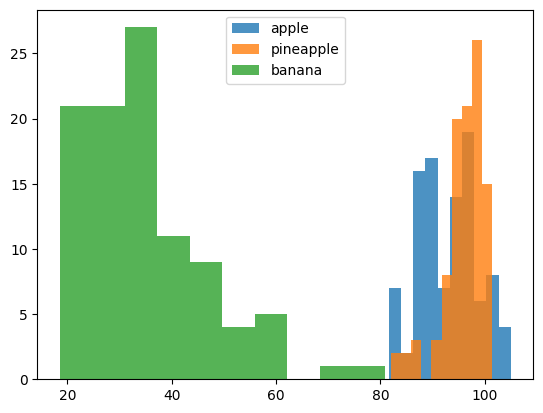

In [ ]:
# 각 과일 100개의 픽셀 값을 히스토그램으로 표현
plt.hist(apple.mean(axis = 1), alpha = 0.8)
plt.hist(pineapple.mean(axis = 1), alpha = 0.8)
plt.hist(banana.mean(axis = 1), alpha = 0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

# alpha 값이 1보다 작다면 투명도를 줄 수 있음.

<BarContainer object of 10000 artists>

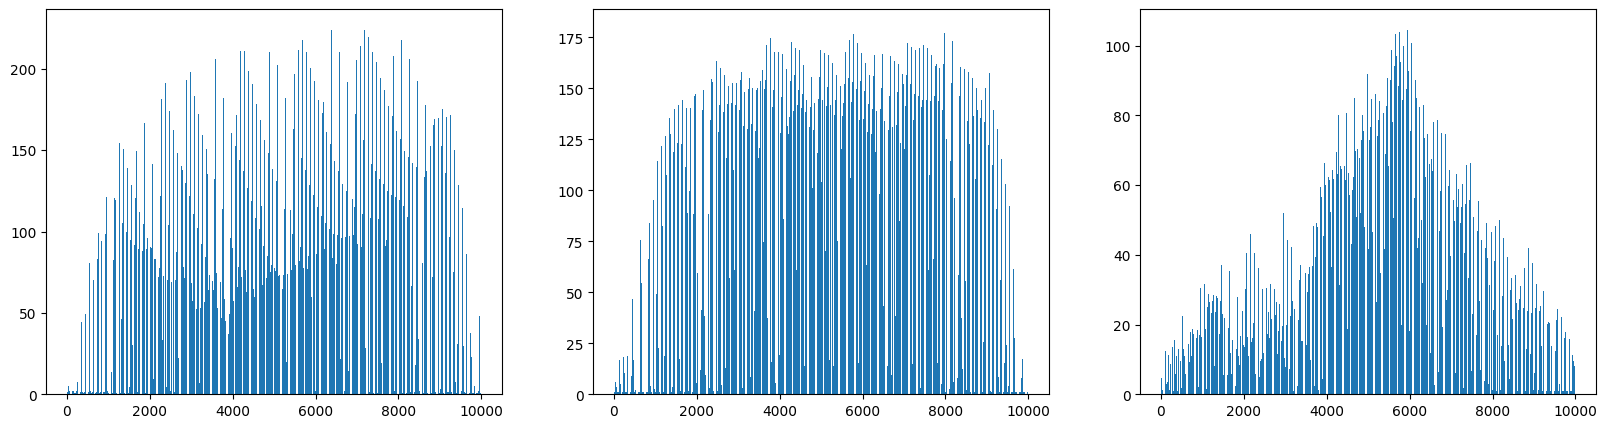

In [ ]:
# 픽셀 별 평균 값으로 히스토그램 그리기
fig, axs = plt.subplots(1,3, figsize = (20, 5))
axs[0].bar(range(10000), np.mean(apple, axis =0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))

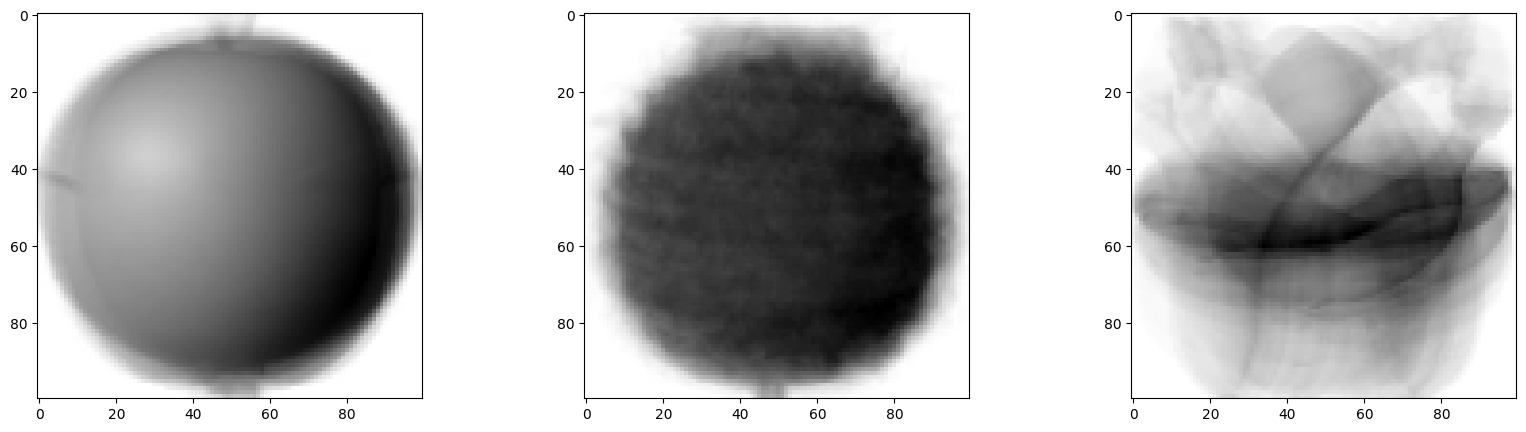

In [ ]:
# 이미지로 출력해보기
apple_mean = np.mean(apple, axis =0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100,100)
banana_mean = np.mean(banana, axis = 0).reshape(100,100)
fig, axs = plt.subplots(1,3, figsize = (20, 5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap ='gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

In [ ]:
# 평균값과 가까운 사진 고르기
# 절댓값 오차를 사용해 평균값과 가까운 사진 고르기
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

(300,)


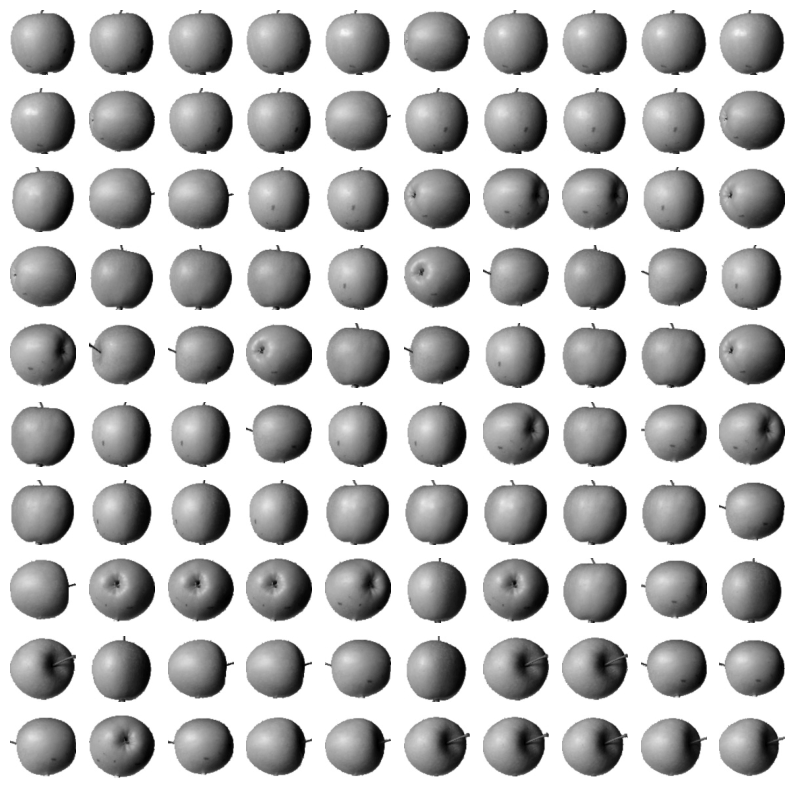

In [ ]:
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10 , figsize = (10,10))
for i in range(10):
  for j in range(10):
    axs[i][j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray_r')
    axs[i][j].axis('off')
plt.show()

# 비슷한 샘플끼리 그룹으로 모으는 작업을 군집이라 함
# 균집 알고리즘에서 만든 그룹을 클러스터

## 6-2 k-평균

### k-평균 군집 알고리즘이 평균값을 자동으로 찾아준다. 이 평균값이 클러스터의 중심에 위치하기 때문에 클러스터 중심 또는 센트로이드라 함.

### 단계
1. 무작위로 k 개의 클러스터 중심을 정함.
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스의 샘플로 지정
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다.
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다.

In [ ]:
# KMeans 클래스
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-08-28 06:02:28--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-08-28 06:02:28--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-08-28 06:02:28--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruits_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [ ]:
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


In [18]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

In [12]:
draw_fruits(fruits[km.labels_==0])
# 사과가 대부분

NameError: name 'km' is not defined

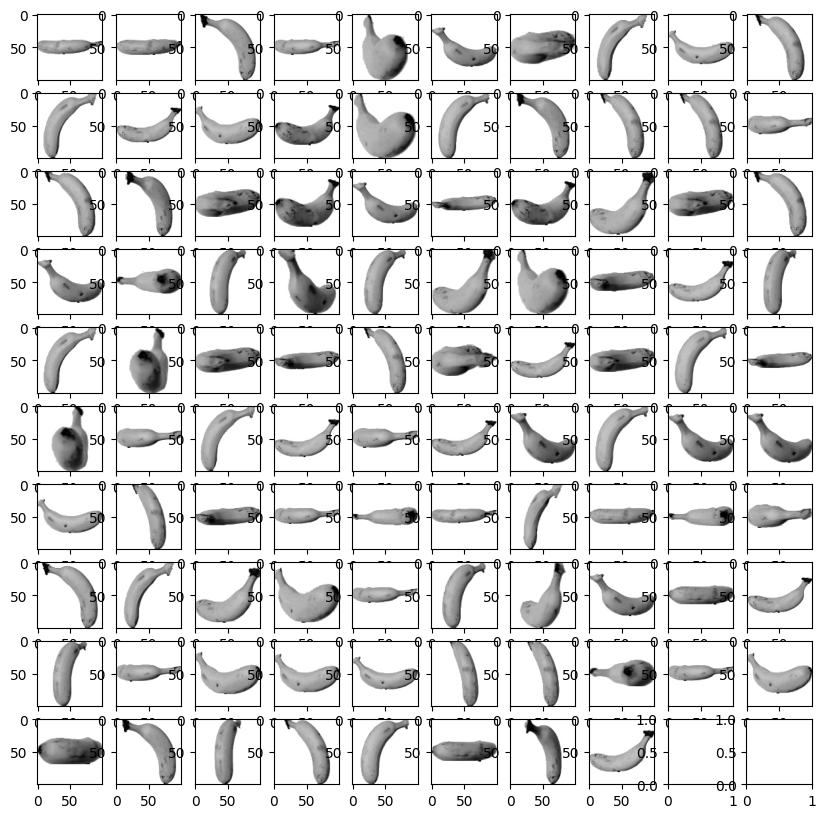

In [ ]:
draw_fruits(fruits[km.labels_==1])
# 바나나가 대부분

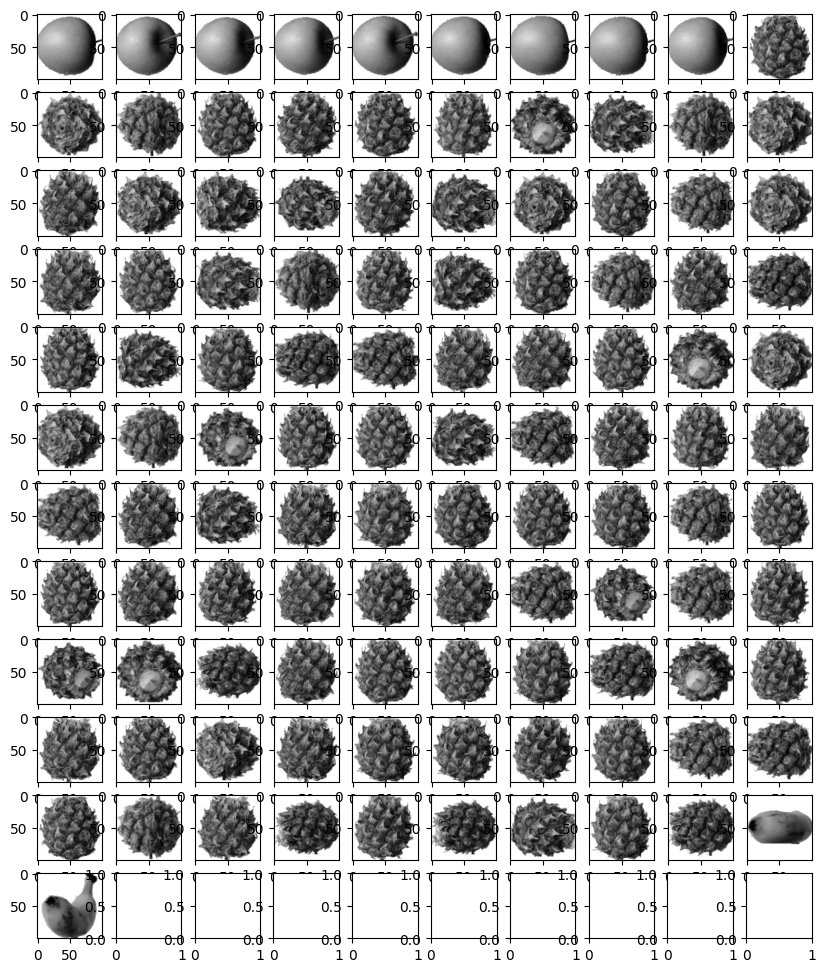

In [ ]:
draw_fruits(fruits[km.labels_==2])

# 3개의 과일 모두 존재

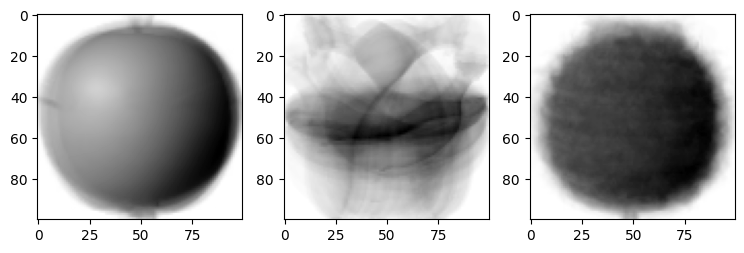

In [ ]:
# 클러스터 중심
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio = 3)
# 0번은 사과, 1번은 바나나, 2번은 파인애플

In [ ]:
print(km.transform(fruits_2d[100:101]))

[[5267.70439881 8837.37750892 3393.8136117 ]]


In [ ]:
print(km.predict(fruits_2d[100:101]))
# 예측 결과 파인애플

[2]


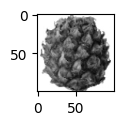

In [ ]:
draw_fruits(fruits[100:101])
# 파인애플 사진

In [ ]:
print(km.n_iter_)
# K의 개수는 4개

4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

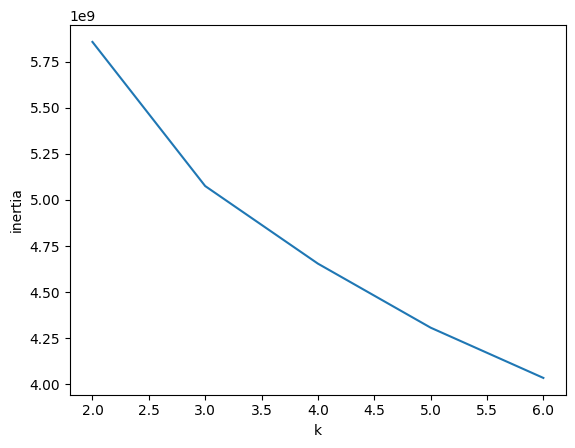

In [ ]:
# 최적의 k 값 찾기
# 엘보우방법: 클러스터 중심부와 샘플사이의 거리를 재고, 이 거리의 제곱 값을 이니셔라 함.
# 엘보우 방법은 클러스터의 개수를 늘려가며 이너셔의 변화를 관찰=> 최적의 클러스터 개수를 찾는다.
# 클러스터 개수를 증가시키며 이너셔를 그리면 그래프가 꺽이는 지점이 있는데 이 후에는 클러스터의 개수를 늘려도 클러스터에 밀집된 정도가 크게 개선되지 않음

inertia =[]
for k in range(2,7):
  km = KMeans(n_clusters = k, random_state = 42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# 그래프가 꺽이는 지점: k가 3, inertia가 5.00인 지점

## 6-3 주성분 분석

### 차원과 차원 축소
- 과일 사진의 경우 10000픽셀이 있어 10000개의 특성을 지니고 있음 => 이런 특성을 차원이라 부름.
- 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터의 크기를 줄이고 지도학습 모델의 성능을 향상시킬 수 있음.
- e.g. 주성분 분석

In [2]:
# 주성분 분석 소개
# 데이터에 있는 분산이 큰 방향을 찾는 것
# 분산이 큰 방향: 데이터를 잘 표현하는 어떤 벡터 => 이 벡터를 주성분이라 함.
# 주성분은 원본 차원과 같고 주성분으로 바꾼 데이터는 차원이 줄어든다.

# PCA 클래스
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)


--2024-08-29 02:44:33--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-08-29 02:44:33--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-08-29 02:44:33--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [3]:
# PCA 클래스 불러오기

from sklearn.decomposition import PCA
pca = PCA(n_components = 50) # 주성분 개수를 정하는 매개변수 components
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
# 주성분 형태 출력
print(pca.components_.shape)

(50, 10000)


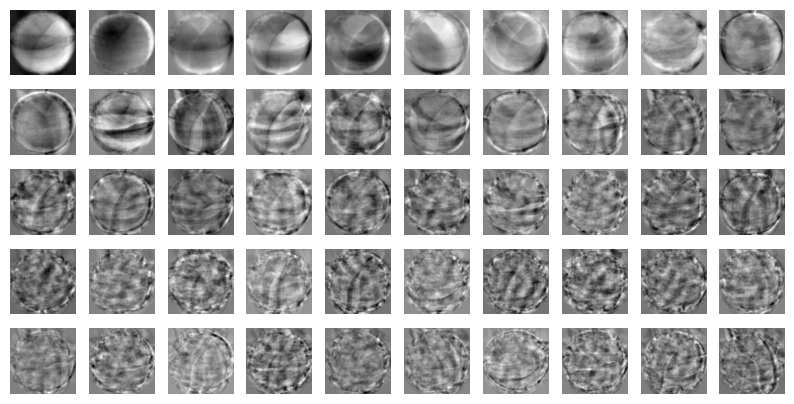

In [17]:
# 과일 그림을 그려주는 함수인 draw_fruits()를 사용해 주성분들의 그림 그리기
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [19]:
print(fruits_2d.shape)

(300, 10000)


In [20]:
50개의 특성을 지닌 데이터
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


In [21]:
# 원본 데이터 재구성
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


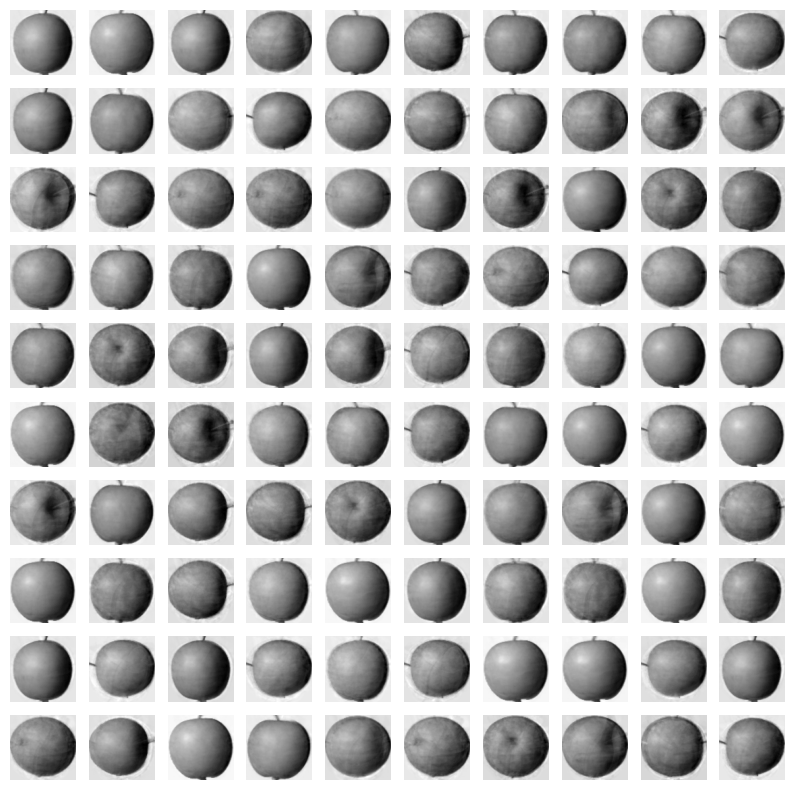

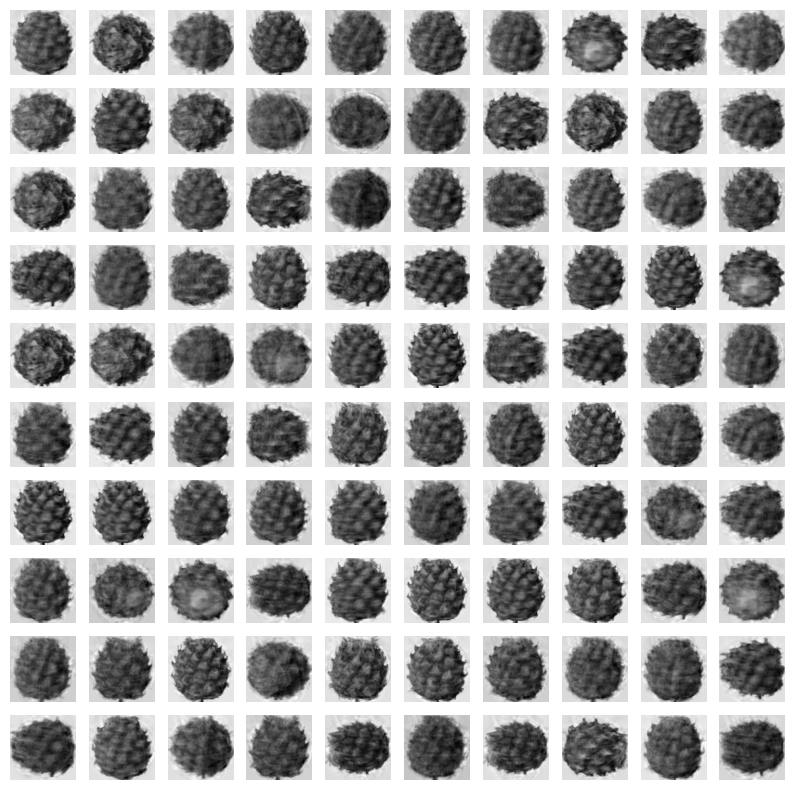

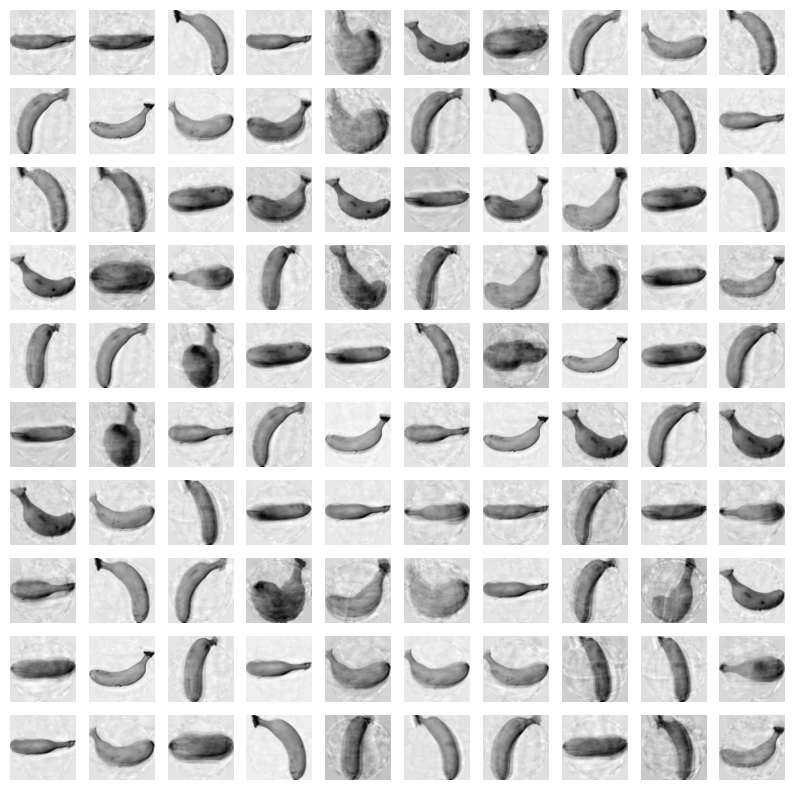

In [22]:
# fruits_pca을 이용해 10000개의 특성 복원하기
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [26]:
# 설명된 분산: 주성분이 원본 데이터를 얼마나 분산을 잘 나타내는지 기록한 값
# PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 주성분이 기록되어 있음.
# 이 분산 비율을 다 더하면 총 분산 비용을 얻을 수 있음
print(pca.explained_variance_ratio_)
print("\n")
print(np.sum(pca.explained_variance_ratio_))

[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281329
 0.02573267 0.02054963 0.01372276 0.01342773 0.01152146 0.00944596
 0.00878232 0.00846697 0.00693049 0.00645188 0.00578896 0.00511202
 0.00486381 0.00480342 0.00447835 0.00437316 0.00408036 0.00389473
 0.00372434 0.00359284 0.0033145  0.00317669 0.0030434  0.00303726
 0.00288895 0.0027591  0.00264943 0.00255596 0.00251923 0.00247339
 0.00239555 0.00230804 0.00222081 0.00216151 0.00213914 0.00195213
 0.00192556 0.00190553 0.00184273 0.00181651 0.00172743 0.00168962
 0.00162439 0.00158927]


0.9215200777110854


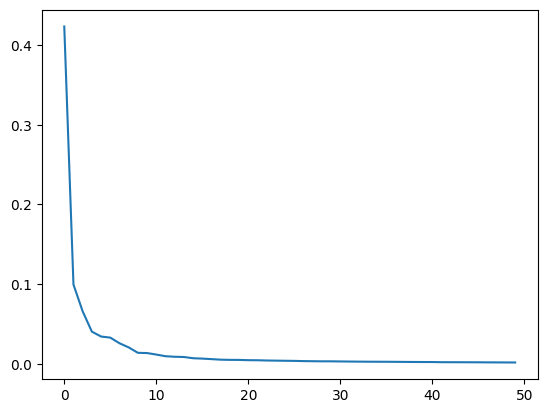

In [27]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

# 결과 해석
# 처음 10개의 주성분이 대부분의 분산을 표현 그 다음부터 주성분이 설명하고 있는 주성분은 비교적 작다.


In [31]:
# 다른 알고리즘과 사용하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100 + [1]* 100 + [2]*100)
# 사과를 0 파인애플을 1 바나나를 2로 지정함

# raw 데이터로 교차 검증 진행
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 테스트 점수(정확도): 0.9966666666666667
# 걸린 시간: 4.023878812789917

0.9966666666666667
4.023878812789917


In [32]:
# 주성분으로 교차검증
scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 테스트 점수(정확도): 1.0
# 걸린 시간: 0.036117935180664064

1.0
0.036117935180664064


In [33]:
# PCA는 설명된 분산 값을 입력하면 그 값에 도달할 때 까지 자동으로 주성분을 찾는다.
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [34]:
# 설명된 분산 값이 0.5가 될 때 주성분의 개수는 2개
print(pca.n_components_)

2


In [35]:
fruit_pca = pca.transform(fruits_2d)
print(fruit_pca.shape)

(300, 2)


In [36]:
scores = cross_validate(lr, fruit_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 정확도: 0.9933333333333334
# 걸린 시간: 0.06183772087097168

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.9933333333333334
0.06183772087097168


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
# 차원 축소된 데이터를 사용해 k-평균 알고리즘으로 클러스터 찾기
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(fruit_pca)
print(np.unique(km.labels_, return_counts= True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


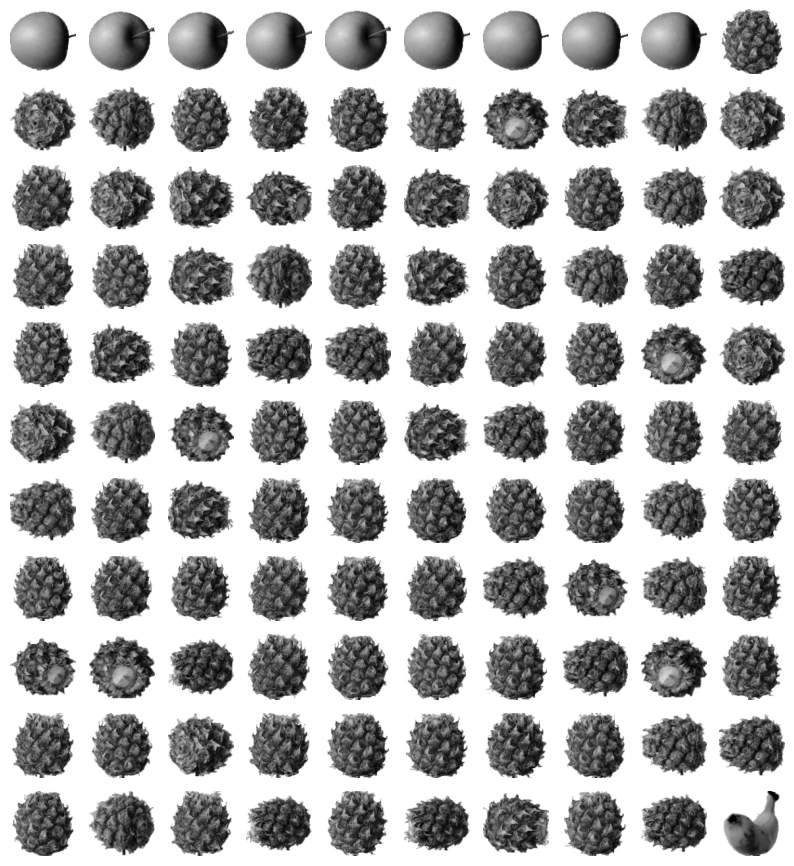

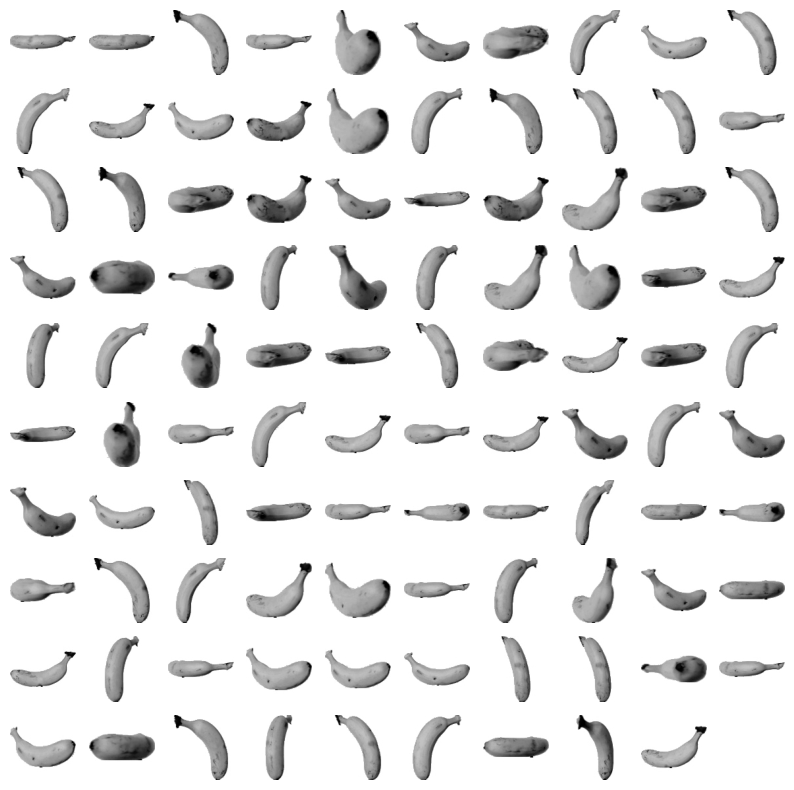

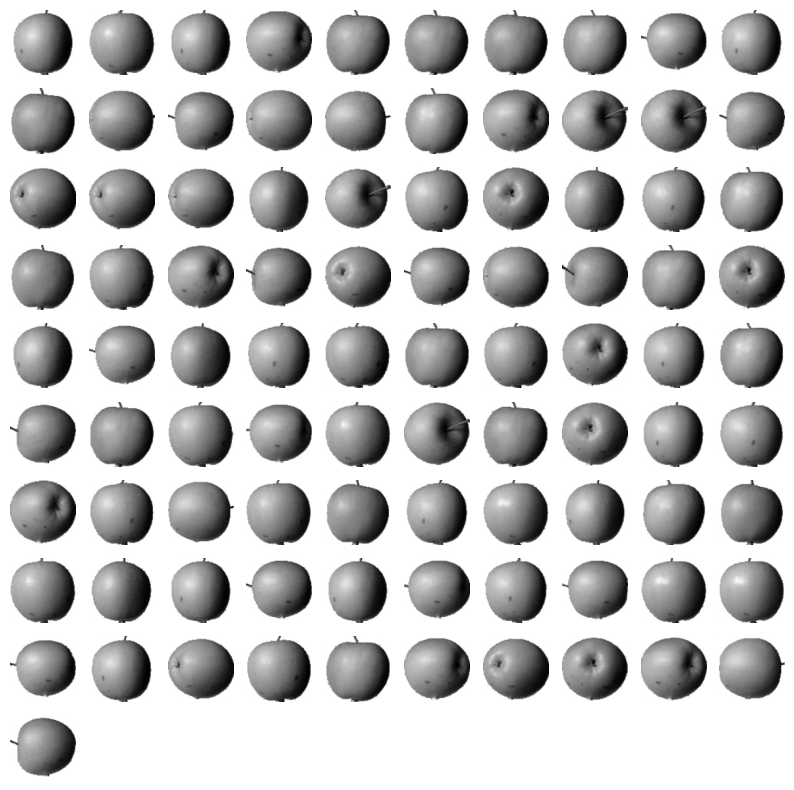

In [38]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ ==  label])
  print("\n")

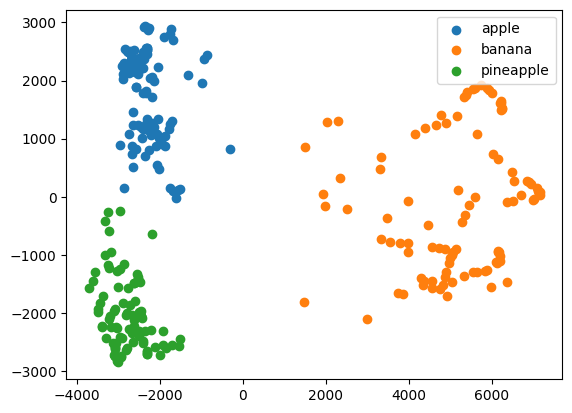

In [40]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:, 0], data[:, 1])
plt.legend(['apple','banana','pineapple'])
plt.show()